# Capstone 3 - Exploratory Data Analysis

### Table of contents
* [1.0 Intorduction](#1.0)
    * [1.1 Purpose](#1.1)
    * [1.2 Approach](#1.2)
* [2.0 Load the data](#2.0)
    * [2.1 Imports](#2.1)
    * [2.2 Load data](#2.2)
    * [2.3 Adjust elements of the data for EDA suitability](#2.3)
* [3.0 Exploring the data](#3.0)
    * [3.1 Selecting one time series to view](#3.1)
    * [3.2 Inspecting missing data](#3.2)
    * [3.3 Imputing missing data](#3.3)
    * [3.4 Updating missing information](#3.4)
* [4.0 Visualizing sales data](#4.0)
    * [4.1 Sales by year for entire Favorita organization](#4.1)
    * [4.2 Sales by month for entire Favorita organization](#4.2)
    * [4.3 Sales by year for each grouping category](#4.3)
    * [4.4 Daily sales trends](#4.4)
* [5.0 Visualizing non-sales data](#5.0)
    * [5.1 Visualizing oil data](#5.1)
    * [5.2 Visualizing transaction data](#5.2)
    * [5.3 Relationships between time series](#5.3)
* [6.0 Decomposing the time series](#6.0)
    * [6.1 Dickey-Fuller test](#6.1)
    * [6.2 Seasonal decomposition](#6.2)
* [7.0 Output and Summary](#7.0)

### 1.0 Introduction: <a id='1.0'></a>

In order to stay in business, commercial grocery stores must offer prices that are commensurate with competitors, offer deals to entice customers, and accurately predict which products, and the quantity of those products, to keep in stock. These considerations are confounded by the effect of both seasonal and regional trends.

Especially for grocers, the consequences of poor inventory management are dire. Perishable items like fruits and vegetables can rot before selling if they are overstocked. Conversely, many locations do not have the real estate or capability to store overstocked, low-demand items that are not selling. According to Retail Wire, overstocking costs the average retailer 3.2% in lost revenue, while understocking items can cost 4.1%. A review of the data has shown that overstocks are costing retailers \\$123.4 billion every year, and understocks remove another \\$129.5 billion from net inflows. [1]

#### 1.1 Purpose<a id='1.1'></a>

Using Kaggle data available from Favorita grocery stores located in Ecuador [2], we will assess and predict sales of available items using time series analysis. There are multiple datasets that will require some data to be merged. We have information on transactions, stores, regions, holidays, and even oil pricing.

[1] https://www.retailwire.com/discussion/retailers-suffer-the-high-cost-of-overstocks-and-out-of-stocks/

[2] Alexis Cook, DanB, inversion, Ryan Holbrook. (2021). Store Sales - Time Series Forecasting. Kaggle. https://kaggle.com/competitions/store-sales-time-series-forecasting


#### 1.2 Approach<a id='1.2'></a>

We will use machine learning time series analysis to forecast sales of different types of items across dozens of stores. This will allow Favorita to become more efficient with its distribution of resources, and more likely to attract customers to purchase certain products at certain times. This analysis can also inform the company of the best times to offer discounts, whether to stock up on certain items, and knowledge of general market trends.


### 2.0 Load our cleaned data<a id='2.0'></a>

#### 2.1 Imports<a id='2.1'></a>

In [1]:
# import needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
from matplotlib.dates import DateFormatter
import seaborn as sns
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.colors import BoundaryNorm, ListedColormap
from datetime import timedelta, datetime
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from numpy.polynomial.polynomial import polyfit
from scipy.stats import pearsonr


In [2]:
import warnings
warnings.filterwarnings('ignore')

#### 2.2 Load data<a id='2.2'></a>

In [3]:
df = pd.read_csv('./merged_data.csv')

In [4]:
df

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,local_holiday,regional_holiday,national_holiday,transactions,dcoilwtico
0,0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,0,0,1,0,93.14
1,1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,0,0,1,0,93.14
2,2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,0,0,1,0,93.14
3,3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,0,0,1,0,93.14
4,4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,0,0,1,0,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,0,0,0,2155,47.57
3000884,3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,0,0,0,2155,47.57
3000885,3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,0,0,0,2155,47.57
3000886,3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,0,0,0,2155,47.57


#### 2.3 Adjust elements of the data for EDA suitability<a id='2.3'></a>

The data contains 2 extra rows that mirror the index number, so we can eliminate them.

In [5]:
df = df.drop(columns=[df.columns[0],df.columns[1]])
df.head()

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,local_holiday,regional_holiday,national_holiday,transactions,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,0,0,1,0,93.14
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,0,0,1,0,93.14
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,0,0,1,0,93.14
3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,0,0,1,0,93.14
4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,0,0,1,0,93.14


We can check the data types to get an idea of what type changes may need to occur.

In [6]:
df.dtypes

date                 object
store_nbr             int64
family               object
sales               float64
onpromotion           int64
city                 object
state                object
type                 object
cluster               int64
local_holiday         int64
regional_holiday      int64
national_holiday      int64
transactions          int64
dcoilwtico          float64
dtype: object

As this analysis will be time series, we need to set the index to the datetime object 'date' column.

In [7]:
df['date'] = pd.to_datetime(df["date"])

In [8]:
df.set_index('date',inplace=True)

In [9]:
df['family'] = df['family'].str.replace(",","_").str.replace(" ","_")

In [10]:
df.head()

,store_nbr,family,sales,onpromotion,city,state,type,cluster,local_holiday,regional_holiday,national_holiday,transactions,dcoilwtico
date,,,,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,0,0,1,0,93.14
2013-01-01,1,BABY_CARE,0.0,0,Quito,Pichincha,D,13,0,0,1,0,93.14
2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,0,0,1,0,93.14
2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,0,0,1,0,93.14
2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,0,0,1,0,93.14


Now that we are properly indexed, we can make all of the categorical variables, 'category' type.

In [11]:
to_cat = ['family','city', 'state', 'type','store_nbr','cluster']
df[to_cat] = df[to_cat].apply(lambda x: x.astype('category'))

In [12]:
df.dtypes

store_nbr           category
family              category
sales                float64
onpromotion            int64
city                category
state               category
type                category
cluster             category
local_holiday          int64
regional_holiday       int64
national_holiday       int64
transactions           int64
dcoilwtico           float64
dtype: object

### 3.0 Exploring the data<a id='3.0'></a>

To get an idea of how the data looks, we can view a time series of a single product from a single store.

Guayaquil is Ecuador's largest city, and everyone needs groceries, so we will look at a store's time series at the intersection of those two variables.

In [13]:
Guayaquil_stores = list(df[df['city']=='Guayaquil'].store_nbr.unique())
Guayaquil_stores

[24, 26, 28, 29, 30, 32, 34, 51]

In [14]:
Guayaquil_stores_num = len(Guayaquil_stores)
Guayaquil_stores_num

8

In [15]:
Guayaquil_stores_num/len(df.store_nbr.unique())

0.14814814814814814

#### 3.1 Selecting one time series to view<a id='3.1'></a>

There are 8 stores in Guayaquil from which to choose, and the number of stores just in this city alone account for nearly 15% of all Favorita locations.

Since food is the most essential thing you can buy at stores, and Favorita is foremost a grocery store, we are interested in a grocery-related family of products.

In [16]:
df[df['family'].str.contains('GROCER')].family.unique()

['GROCERY_I', 'GROCERY_II']
Categories (33, object): ['AUTOMOTIVE', 'BABY_CARE', 'BEAUTY', 'BEVERAGES', ..., 'PREPARED_FOODS', 'PRODUCE', 'SCHOOL_AND_OFFICE_SUPPLIES', 'SEAFOOD']

This data was pre-aggregated into product families, so the reasoning behind 2 separate 'grocery' categories is not intuitive. For our purposes, we can just pick the first store (24) and family (GROCERY I) to explore for now.

In [17]:
Guayaquil_groceryI = df[(df['store_nbr']==24) & (df['family']=='GROCERY_I')]

Text(0.5, 1.0, 'GROCERY I at store #24')

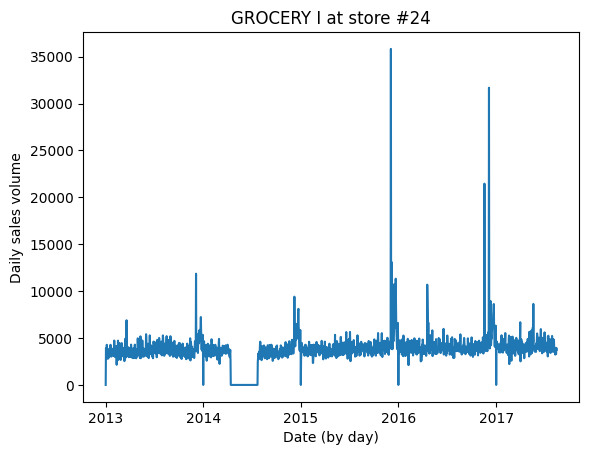

In [18]:
plt.plot(Guayaquil_groceryI['sales'])
plt.xlabel("Date (by day)")
plt.ylabel("Daily sales volume")
plt.title('GROCERY I at store #24')

Already, we can make a few observations.

First, there is a glaring period of missing sales information in 2014.

Second, the sales annually drop to 0 as the year changes, with peaks occurring just before.

It would be informative for the determination of where the missing data originates from, if we could see a time series for 'GROCERY I' at a different store, and conversely a time series for a different family of products at the same store.

In [19]:
Guayaquil_groceryI_32 = df[(df['store_nbr']==32) & (df['family']=='GROCERY_I')]

In [20]:
Guayaquil_automotive = df[(df['store_nbr']==24) & (df['family']=='AUTOMOTIVE')]

Text(0.5, 1.0, 'GROCERY I at Store #32')

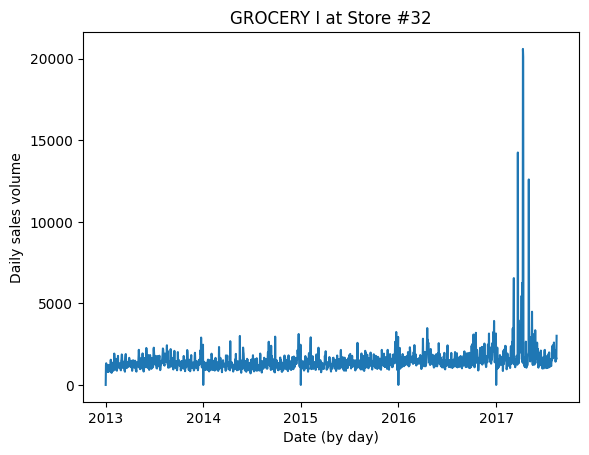

In [21]:
plt.plot(Guayaquil_groceryI_32['sales'])
plt.xlabel("Date (by day)")
plt.ylabel("Daily sales volume")
plt.title("GROCERY I at Store #32")

Text(0.5, 1.0, 'AUTOMOTIVE at Store #24')

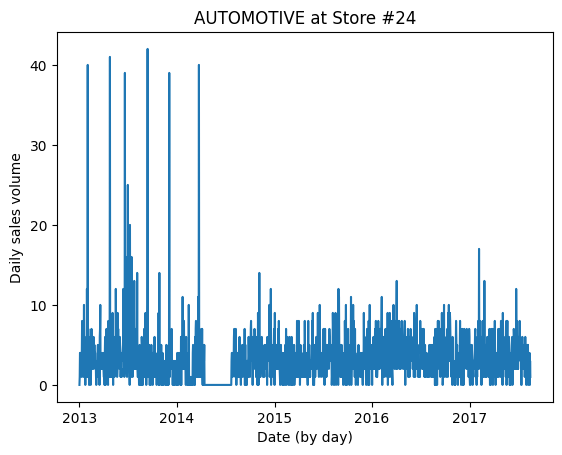

In [22]:
plt.plot(Guayaquil_automotive['sales'])
plt.xlabel("Date (by day)")
plt.ylabel("Daily sales volume")
plt.title("AUTOMOTIVE at Store #24")

Based on these graphs, the 2014 missing data issue seems to be associated with store 24, and not specific to the family.

#### 3.2 Inspecting missing data<a id='3.2'></a>

We can take a closer look at the 2014 data to see where the missing data is located.

Text(0.5, 1.0, '2014 GROCERY I at Store #24')

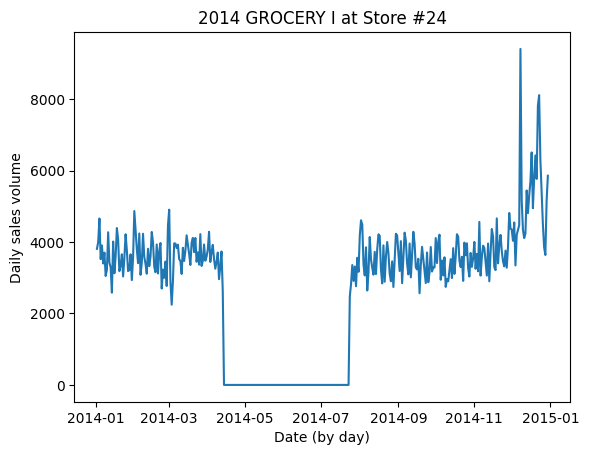

In [23]:
gg2014 = Guayaquil_groceryI[(Guayaquil_groceryI.index > '2014-01-01')
                             & (Guayaquil_groceryI.index < '2014-12-31')]
plt.xlabel("Date (by day)")
plt.ylabel("Daily sales volume")
plt.plot(gg2014['sales'])
plt.title("2014 GROCERY I at Store #24")

We can detect time differences of more than one day by making the index a series and using the .diff() method .

In [24]:
deltas = Guayaquil_groceryI.index.to_series().diff()[1:]

# Filter diffs (here days > 1, but could be seconds, hours, etc)
missing_data = deltas[deltas > timedelta(days=1)]

In [25]:
missing_data

date
2013-12-26   2 days
2014-12-26   2 days
2015-12-26   2 days
2016-12-26   2 days
Name: date, dtype: timedelta64[ns]

The interesting thing is that this method worked for "gaps" on a technical basis, but our problem is actually that we have zeros in the sales data where the theoretical "gap" actually occurs. We can resolve the gap issue later, but for now will focus on amending the missing data.

We can subset the data to see only days with zero sales for this combination of product & store.

In [26]:
Guayaquil_groceryI[Guayaquil_groceryI['sales']==0]

,store_nbr,family,sales,onpromotion,city,state,type,cluster,local_holiday,regional_holiday,national_holiday,transactions,dcoilwtico
date,,,,,,,,,,,,,
2013-01-01,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,1,0,93.14
2014-01-01,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,1,0,98.17
2014-04-14,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,104.05
2014-04-15,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,103.70
2014-04-16,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,103.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-22,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,104.59
2014-07-23,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,103.81
2015-01-01,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,1,0,53.45


However, there are many zero values, and not all of them are large gaps.

We can subset for only consecutive zero sales days.

In [27]:
col = Guayaquil_groceryI['sales']
cond = (col.eq(0) & col.shift().eq(0)) | (col.eq(0) & col.shift(-1).eq(0))
Guayaquil_groceryI.loc[cond]

,store_nbr,family,sales,onpromotion,city,state,type,cluster,local_holiday,regional_holiday,national_holiday,transactions,dcoilwtico
date,,,,,,,,,,,,,
2014-04-14,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,104.05
2014-04-15,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,103.70
2014-04-16,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,103.71
2014-04-17,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,104.33
2014-04-18,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,1,0,104.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-19,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,103.83
2014-07-20,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,103.83
2014-07-21,24,GROCERY_I,0.0,0,Guayaquil,Guayas,D,1,0,0,0,0,105.34


This subset informs us that the gap is 101 days in length.

#### 3.3 Imputing missing data<a id='3.3'></a>

For this and future time gaps, we can use a technique known as imputation to forecast what the missing data could have been.

We can make a function that splits a time series into 2 parts that represent the data available from both before and after the large gap. Then the function can use exponential smoothing in both directions to interpolate what the missing information could have been, probabilistically.

In [28]:
def impute_missing(df, target, gap_start, gap_end, seasonal_periods = 7):
    
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    
    
    firstTS = df[df.index < gap_start][target]
    secondTS = df[df.index > gap_end][target]
    
    one = timedelta(days=1)
    secondTSr = secondTS[::-1]
    firstTSr = firstTS[::-1]
    indexr = pd.date_range(start=firstTS.index[0], end=secondTS.index[-1])
    firstTSr.index = indexr[-len(firstTSr):]
    secondTSr.index = indexr[:len(secondTSr)]
    
    # convert string to date object
    if isinstance(gap_start, datetime):
        d1 = gap_start
    else:
        d1 = datetime.strptime(gap_start, "%Y-%m-%d")
        
    if isinstance(gap_end, datetime):
        d2 = gap_end
    else:
        d2 = datetime.strptime(gap_end, "%Y-%m-%d")

    # difference between dates in timedelta
    delta = d2 - d1
    
    #FORWARD
    
    es = ExponentialSmoothing(firstTS, seasonal_periods=seasonal_periods,seasonal='add').fit()
    forwardPrediction = es.predict(start=len(firstTS), end=timedelta(days=len(firstTS)).days+delta.days)
    forwardPrediction.index = pd.date_range(start=gap_start, end=gap_end, freq="D")
    

    #BACKWARD
    es = ExponentialSmoothing(firstTSr, seasonal_periods=seasonal_periods,seasonal='add').fit()
    backwardPrediction = es.predict(start=len(firstTSr), end=timedelta(days=len(firstTS)).days+delta.days)
    backwardPrediction.index = pd.date_range(start=gap_start, end=gap_end, freq="D")
    

    #INTERPOLATION
    l = len(forwardPrediction)
    interpolation = pd.Series([(backwardPrediction[i] * i + forwardPrediction[i] * (l -i) )/ l for i in range(l)], index=forwardPrediction.index)
  
    return interpolation


We can then put our function to use where necessary, starting with the dataset of interest (Guayaquil store 24, Grocery I).

Plotting the forecated sales from the missing data period lets us see whether the new data look realistic.

To get an even better idea of how our new data looks, we can superimpose the replacements of those zero values with the forecasted ones.

We can use sseasonal periods of 30 , 14, and 7 days (month, fortnight, and week timespans) to create the new data, then compare results.

In [29]:
Guayaquil_groceryI = df[(df['store_nbr']==24) & (df['family']=='GROCERY_I')]

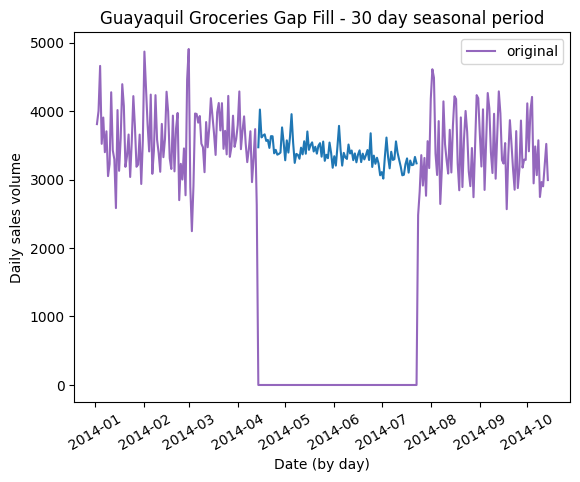

In [30]:
new30 = impute_missing(Guayaquil_groceryI,'sales','2014-04-14','2014-07-23',seasonal_periods=30)

plt.plot(Guayaquil_groceryI[(Guayaquil_groceryI.index < '2014-10-15')&(Guayaquil_groceryI.index >'2014-01-01')].sales, color='C4', label='original')
plt.plot(new30)
plt.title('Guayaquil Groceries Gap Fill - 30 day seasonal period')
plt.legend()
plt.xticks(rotation = 30) 
plt.xlabel("Date (by day)")
plt.ylabel("Daily sales volume")

plt.show()

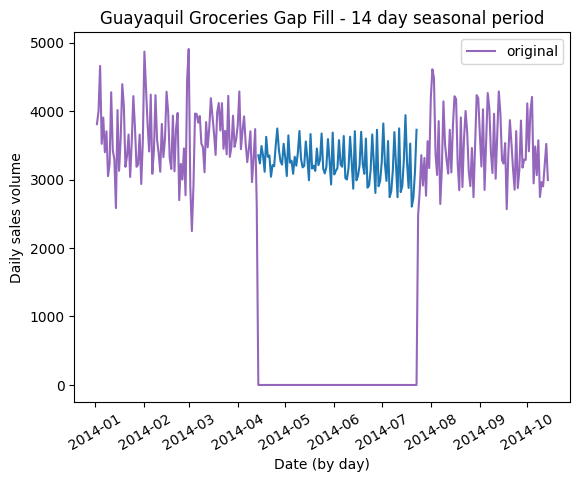

In [31]:
new14 = impute_missing(Guayaquil_groceryI,'sales','2014-04-14','2014-07-23',seasonal_periods=14)

plt.plot(Guayaquil_groceryI[(Guayaquil_groceryI.index < '2014-10-15')&(Guayaquil_groceryI.index >'2014-01-01')].sales, color='C4', label='original')
plt.plot(new14)
plt.title('Guayaquil Groceries Gap Fill - 14 day seasonal period')
plt.legend()
plt.xticks(rotation = 30) 
plt.xlabel("Date (by day)")
plt.ylabel("Daily sales volume")

plt.show()

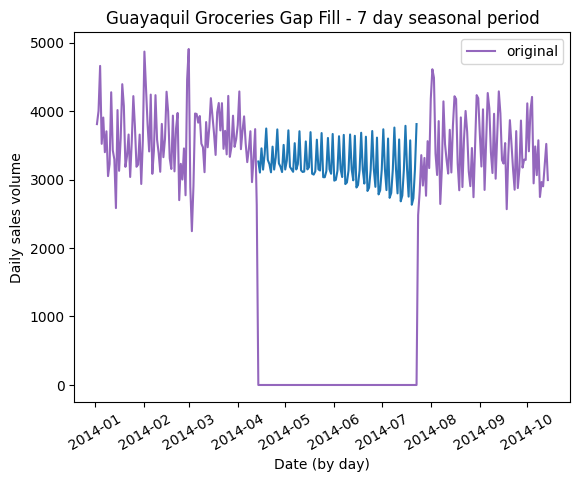

In [32]:
new07 = impute_missing(Guayaquil_groceryI,'sales','2014-04-14','2014-07-23',seasonal_periods=7)

plt.plot(Guayaquil_groceryI[(Guayaquil_groceryI.index < '2014-10-15')&(Guayaquil_groceryI.index >'2014-01-01')].sales, color='C4', label='original')
plt.plot(new07)
plt.title('Guayaquil Groceries Gap Fill - 7 day seasonal period')
plt.legend()
plt.xticks(rotation = 30) 
plt.xlabel("Date (by day)")
plt.ylabel("Daily sales volume")

plt.show()

We will go with seasonal periods of 14 due to the biweekly nature of Ecuador's public-sector wage-disbursements. Visualizing the difference between 30, 14, and 7 day seasonal periods confirms this decision.

While it isn't a perfect solution, the missing data has been filled and appears to be a realistic representation of what one could expect to see.

#### 3.4 Updating missing information<a id='3.4'></a>

Now we can make a function that automates this process (of swapping out all large periods of zero-values for the newly forecasted data), over every combination of 'store_nbr' and 'family'.

In [33]:
def impute_many(df, target, group1, group2):
    
    
    for g1 in df[group1].unique():
        for g2 in df[group2].unique():
            try:
                subgroup = df[(df[group1]==g1) & (df[group2]==g2)]
                col = subgroup[target]
                # condition of there being at least 4 consecutive days missing
                cond = (col.eq(0) & col.shift().eq(0) & col.shift(2).eq(0)) & (col.eq(0) & col.shift(-1).eq(0) & col.shift(-2).eq(0))

                start = min(subgroup.loc[cond].index)-(timedelta(days=2))

                end = max(subgroup.loc[cond].index)+(timedelta(days=2))

                missing_period = (end - start).days+1

                new14 = impute_missing(subgroup,target,start,end,seasonal_periods=14)

                df.loc[(df[group1]==g1)& (df[group2]==g2)&(df.index>=start)&(df.index<=end),target]=new14.values
                df_new = df

            except:
                # In many circumstances, there will be no missing value periods long enough to qualify
                # In other circumstances, there may be a missing value period
                # without enough surrounding information to make an informed imputation
                df_new = df
            

    return df_new


Calling the function and setting its return equal to the original dataframe updates the large periods of missing data.

In [34]:
df = impute_many(df,'sales','store_nbr','family')

Excellent, now we have replaced all large periods of missing data in our entire dataframe.

#### 3.5 Filling gaps<a id='3.5'></a>

As previously discovered, there exist time gaps in our data:

In [35]:
deltas = Guayaquil_groceryI.index.to_series().diff()[1:]

# Filter diffs (here days > 1, but could be seconds, hours, etc)
missing_data = deltas[deltas > timedelta(days=1)]

In [36]:
missing_data

date
2013-12-26   2 days
2014-12-26   2 days
2015-12-26   2 days
2016-12-26   2 days
Name: date, dtype: timedelta64[ns]

Therefore, we can use a range of functions to organize the dataframes and add in the absent dates.

In [37]:
def df_organize(df, var1, var2):
    
    v1_list = df[var1]
    v2_list = df[var2]
    
    length = len(v1_list.unique())*len(v2_list.unique())
    
    list_df_names = []
    list_df = []
    z=0
    
    for e, v1 in enumerate(v1_list.unique()):
        for n, v2 in enumerate(v2_list.unique()):
            
            new_df = df[(v1_list==v1) & (v2_list==v2)]
            
            globals()["Store_{}_{}".format(v1,v2)] = new_df
            list_df_names.append("Store_{}_{}".format(v1,v2))
            list_df.append(new_df)
            
            w = n+z+1
            
    
            print("", end="\r{} of {} dataframes organized".format(w,length))
        z = w
    
    return list_df_names, list_df      

def check_date_range(df):
    
    start = min(df.index)
    end = max(df.index)
  
    all_days = list(pd.date_range(start=start, end=end, freq='D'))
    
    accounted_days = list(df.index)
    
    s = set(accounted_days)
    diff = [x for x in all_days if x not in s]
    
    
    return diff


def fill_gap(df):
    
    missing = check_date_range(df)
    dfa = df.append(pd.DataFrame(index=missing))
    dfa = dfa.sort_index()
    dfa = dfa.fillna(method='ffill')
    
    return dfa
    

def multi_gap_fill(df_names,df_list):
    """
    set a list of dataframes equal to this function to fill in any missing dates
    with immediately previous value
    """
    
    filled_list = []
    
    for e, df in enumerate(df_list):
        
        filled_df = fill_gap(df)
        filled_list.append(filled_df)
        globals()["{}".format(df_names[e])] = filled_df
        print("", end="\r{} of {} gaps filled".format(e+1,len(df_list)))
        
    return filled_list


First, we run the df_organize() function to make each store/family combination its own dataframe.

In [38]:
store_family_list_names,store_family_list = df_organize(df, 'store_nbr', 'family')

1782 of 1782 dataframes organized

In [39]:
print(store_family_list_names[1111])
store_family_list[1111].head()

Store_4_LIQUOR_WINE_BEER


,store_nbr,family,sales,onpromotion,city,state,type,cluster,local_holiday,regional_holiday,national_holiday,transactions,dcoilwtico
date,,,,,,,,,,,,,
2013-01-01,4,LIQUOR_WINE_BEER,0.0,0,Quito,Pichincha,D,9,0,0,1,0,93.14
2013-01-02,4,LIQUOR_WINE_BEER,27.0,0,Quito,Pichincha,D,9,0,0,0,1922,93.14
2013-01-03,4,LIQUOR_WINE_BEER,31.0,0,Quito,Pichincha,D,9,0,0,0,1551,92.97
2013-01-04,4,LIQUOR_WINE_BEER,61.0,0,Quito,Pichincha,D,9,0,0,0,1596,93.12
2013-01-05,4,LIQUOR_WINE_BEER,171.0,0,Quito,Pichincha,D,9,0,0,1,1825,93.12


Then, we use the mulit_gap_fill function to fill in the gaps on all of the 1782 dataframes.

In [40]:
store_family_list = multi_gap_fill(store_family_list_names,store_family_list)

1782 of 1782 gaps filled

Last, we concatenate all of the information back into one dataframe.

In [41]:
df = pd.concat(store_family_list)

In [43]:
# count missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by="count" ,ascending=False)

,count,%
store_nbr,0,0.0
family,0,0.0
sales,0,0.0
onpromotion,0,0.0
city,0,0.0
state,0,0.0
type,0,0.0
cluster,0,0.0
local_holiday,0,0.0
regional_holiday,0,0.0


In [44]:
df

,store_nbr,family,sales,onpromotion,city,state,type,cluster,local_holiday,regional_holiday,national_holiday,transactions,dcoilwtico
2013-01-01,1,AUTOMOTIVE,0.000000,0.0,Quito,Pichincha,D,13,0.0,0.0,1.0,0.0,93.14
2013-01-02,1,AUTOMOTIVE,2.000000,0.0,Quito,Pichincha,D,13,0.0,0.0,0.0,2111.0,93.14
2013-01-03,1,AUTOMOTIVE,3.000000,0.0,Quito,Pichincha,D,13,0.0,0.0,0.0,1833.0,92.97
2013-01-04,1,AUTOMOTIVE,3.000000,0.0,Quito,Pichincha,D,13,0.0,0.0,0.0,1863.0,93.12
2013-01-05,1,AUTOMOTIVE,5.000000,0.0,Quito,Pichincha,D,13,0.0,0.0,1.0,1509.0,93.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,9,SEAFOOD,23.831000,0.0,Quito,Pichincha,B,6,0.0,0.0,1.0,1848.0,48.81
2017-08-12,9,SEAFOOD,16.859001,4.0,Quito,Pichincha,B,6,0.0,0.0,0.0,1920.0,48.81
2017-08-13,9,SEAFOOD,20.000000,0.0,Quito,Pichincha,B,6,0.0,0.0,0.0,1745.0,48.81
2017-08-14,9,SEAFOOD,17.000000,0.0,Quito,Pichincha,B,6,0.0,0.0,0.0,1971.0,47.59


### 4.0 Visualizing sales data<a id='4.0'></a>

Now that gaps are filled and missing values are imputed, we can start to explore how the sales totals look with different parameters.

#### 4.1 Sales by year for entire Favorita organization<a id='4.1'></a>

It would be good to get an idea of how the total sales for each year have progressed.

<function matplotlib.pyplot.show(close=None, block=None)>

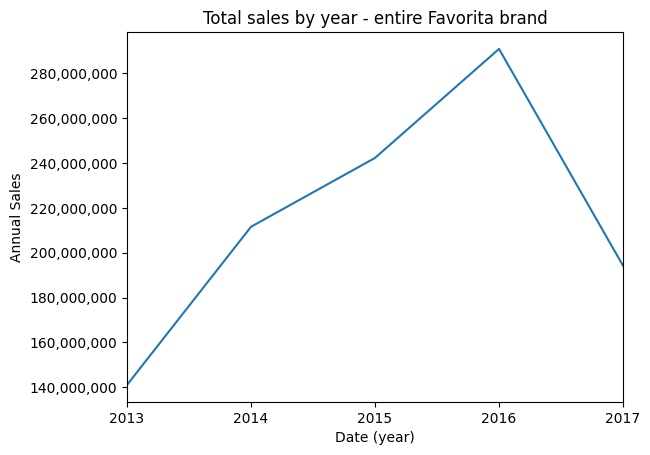

In [45]:
sales_by_year = df.groupby([df.index.to_period('Y')])['sales'].agg(sum)

ax = sales_by_year.plot()
plt.title('Total sales by year - entire Favorita brand')
plt.xlabel('Date (year)')
plt.ylabel('Annual Sales')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show

The caveat with the 2017 data is that the last entry in our dataset is 08/15/2017, so there is still over 4 months left in 2017 that we do not have access to.

Taking only the other 4 years into consideration, we can see healthy year-over-year growth in sales numbers

#### 4.2 Sales by month for entire Favorita organization<a id='4.2'></a>

Does any particular month outperform the others?

We can average each of the months over all of the years.

In [46]:
#In a new dataframe, remove the incomplete month of August 2017
df_no_aug_2017 = df[df.index<'2017-08-01']

#Group by year-month and sum all days for each year-month
sales_by_month = df_no_aug_2017.groupby([df_no_aug_2017.index.to_period('M')]).agg(sum)

#Group by month and average over the years
sales_by_month['month'] = sales_by_month.index.month

sales_by_month_g = sales_by_month.groupby([sales_by_month['month']])['sales'].agg(np.mean)


<function matplotlib.pyplot.show(close=None, block=None)>

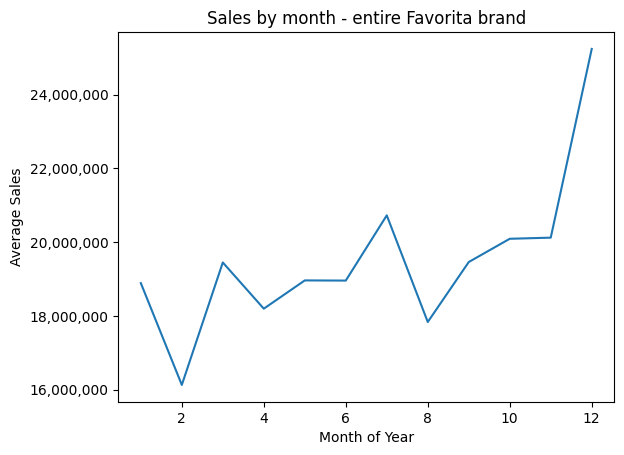

In [47]:

ax = sales_by_month_g.plot()
plt.title('Sales by month - entire Favorita brand')
plt.xlabel('Month of Year')
plt.ylabel('Average Sales')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show


Overwhelmingly, the sales in December are the largest, followed by a mid-summer local peak in July. It appears that customers decrease their shopping budgets in February and August. Interestingly, both of these troughs occur within 2 months of the aforementioned peaks. Perhaps there is an element of 'buyers exhaustion' happening, as people could be choosing to stock up some months, causing lower demand in the following months.

We can also use a seasonal plot by month over the years to visualize patterns and trends.

In [48]:
sales_by_month['year'] = sales_by_month.index.year

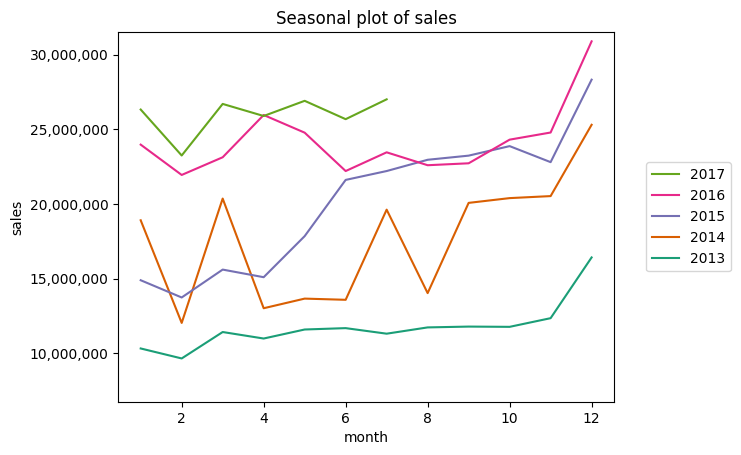

In [49]:
ax = sns.lineplot(x='month',y='sales', data=sales_by_month, hue='year', palette='Dark2')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc="center right", bbox_to_anchor=(1.25,0.5), ncol=1)
ax.set_ylim(min(sales_by_month['sales'])*0.7,max(sales_by_month['sales'])*1.02)
plt.title('Seasonal plot of sales')
plt.show()

We again see the December and July peaks, which seem to occur annually, as well as a March spike.

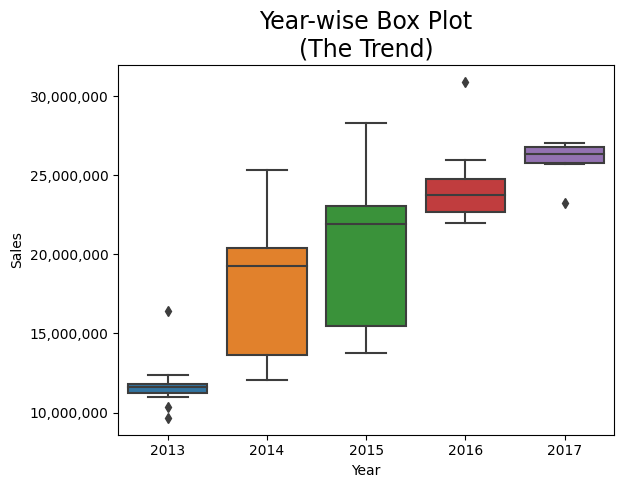

In [50]:
ax = sns.boxplot(x='year',y='sales', data=sales_by_month)
ax.set_title('Year-wise Box Plot\n(The Trend)', fontsize = 17, loc='center')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


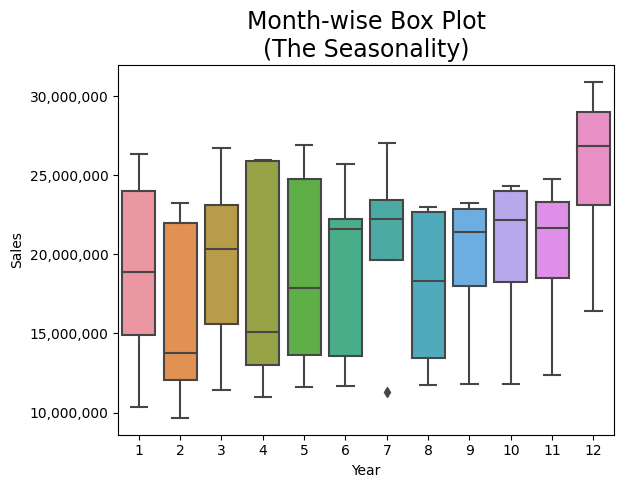

In [51]:
ax = sns.boxplot(x='month',y='sales', data=sales_by_month)
ax.set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 17, loc='center')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


The seasonality continues to favor a December peak, with the yearly trend increasing steadily, while decreasing in variance.

<function matplotlib.pyplot.show(close=None, block=None)>

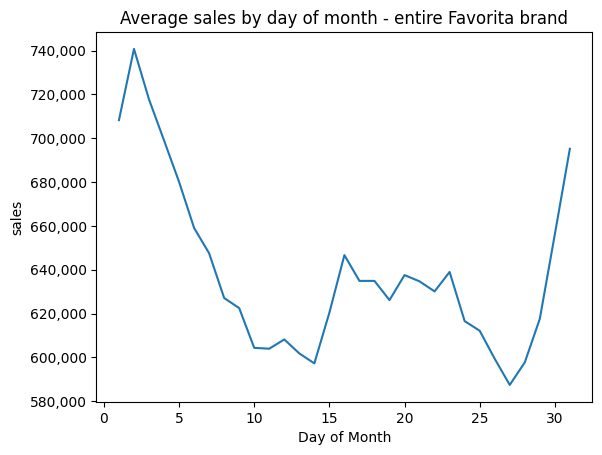

In [52]:
#In a new dataframe, remove the incomplete month of August 2017
df_no_aug_2017 = df[df.index<'2017-08-01']

#Group by year-month and sum all days for each year-month
sales_by_day = df_no_aug_2017.groupby([df_no_aug_2017.index.to_period('D')]).agg(sum)

#Group by month and average over the years
sales_by_day['day'] = sales_by_day.index.day

sales_by_day_g = sales_by_day.groupby([sales_by_day['day']])['sales'].agg(np.mean)

#plot
ax = sales_by_day_g.plot()
plt.title('Average sales by day of month - entire Favorita brand')
plt.xlabel('Day of Month')
plt.ylabel('sales')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show

The intra-monthly pattern shows sales starting each month stronly, with a steady decline until the 14th day, a sharp increase which plateaus until the 23rd. Then a trough occurs around the 25th, followed by a steep incline to finish out the month.

Kaggle tells us that public sector employees are paid bimonthly on the 15th and the last day of each month. That would help to explain the sudden uptick in sales on the 15th and final days of each month.

#### 4.3 Sales by year for each grouping category<a id='4.3'></a>

Which stores/family/cities/types/clusters have the most annual sales volume?

We can make a function that will compile summed sales data by year for different grouping variables, plot graphs to visualize them, and store new varibles for future alanysis:

In [53]:
var_list = ['store_nbr','family','city','state','type','cluster']
def plot_vars(df,target,var_list):
    

    name_list = []
    for e, v in enumerate(var_list):

        g_by = var_list[e]

        grouped_df = df.groupby([df.index.to_period('Y'),g_by])[target].agg(np.mean).unstack()

        
        grouped_df.plot()
        fig = plt.gcf()
        fig.set_size_inches(9, 9)
        plt.title('Average annual sales by {}'.format(v))
        
        if len(grouped_df.columns)>36:
            plt.legend(ncol = 2, loc="upper right", bbox_to_anchor=(1.3,1))
        else:
            plt.legend(ncol = 1, loc="upper right", bbox_to_anchor=(1.5,1))
            
        plt.xlabel('Date (year)')
        plt.ylabel('Average Annual Sales')
        plt.show()

        name_list.append("store_sales_by_{}".format(v))
        globals()["store_sales_by_{}".format(v)] = grouped_df
    
    print("Variable names: \n")
    print(*name_list, sep = '\n')

And now calling the function for our data will show each graph. At the conclusion of its run, it will give the variable names that hold the information used to create the graphs, just in case that data is useful later.

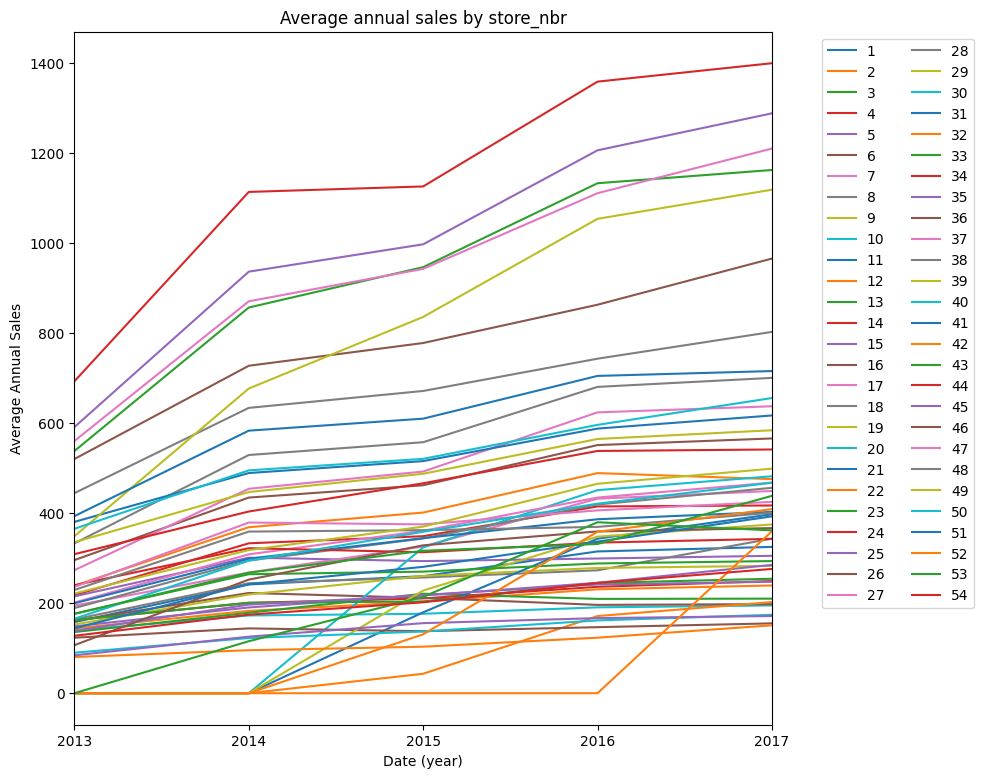

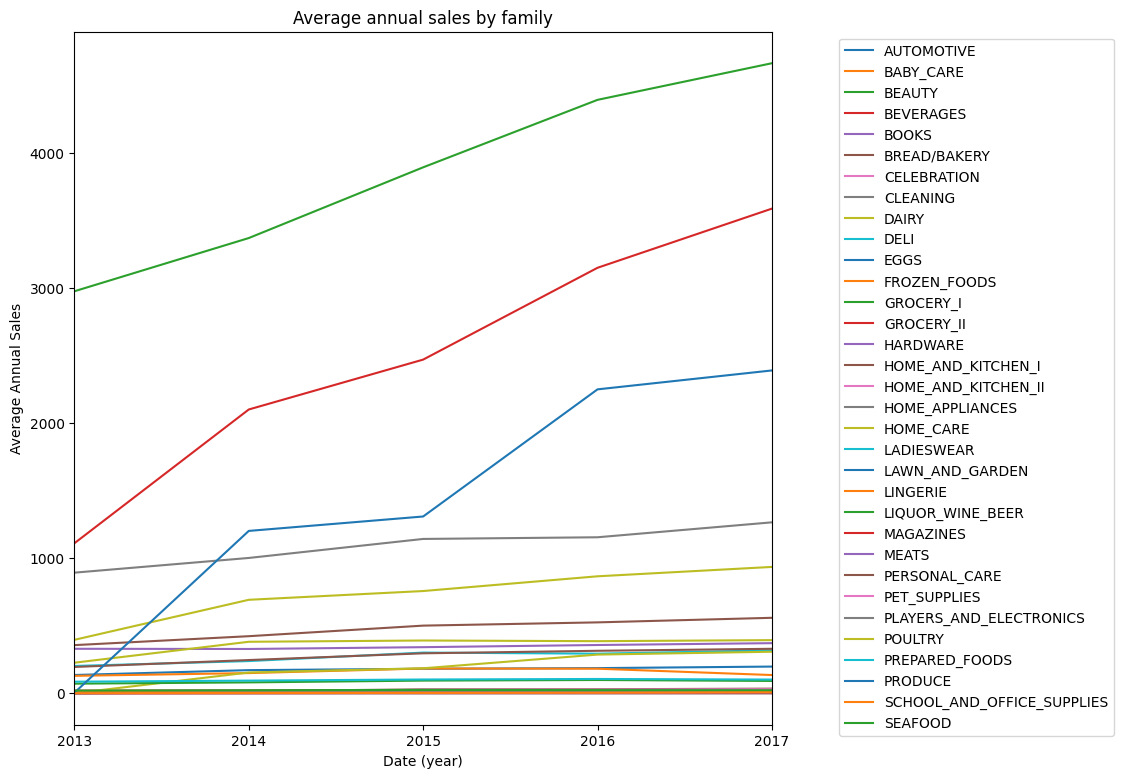

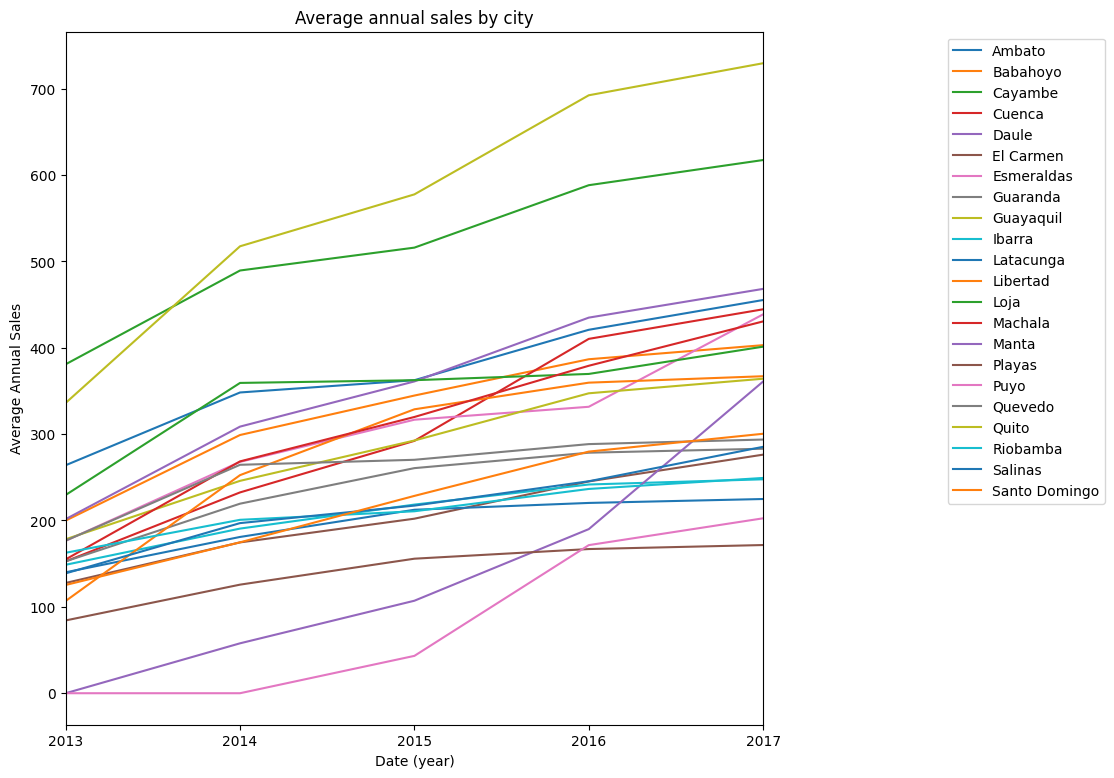

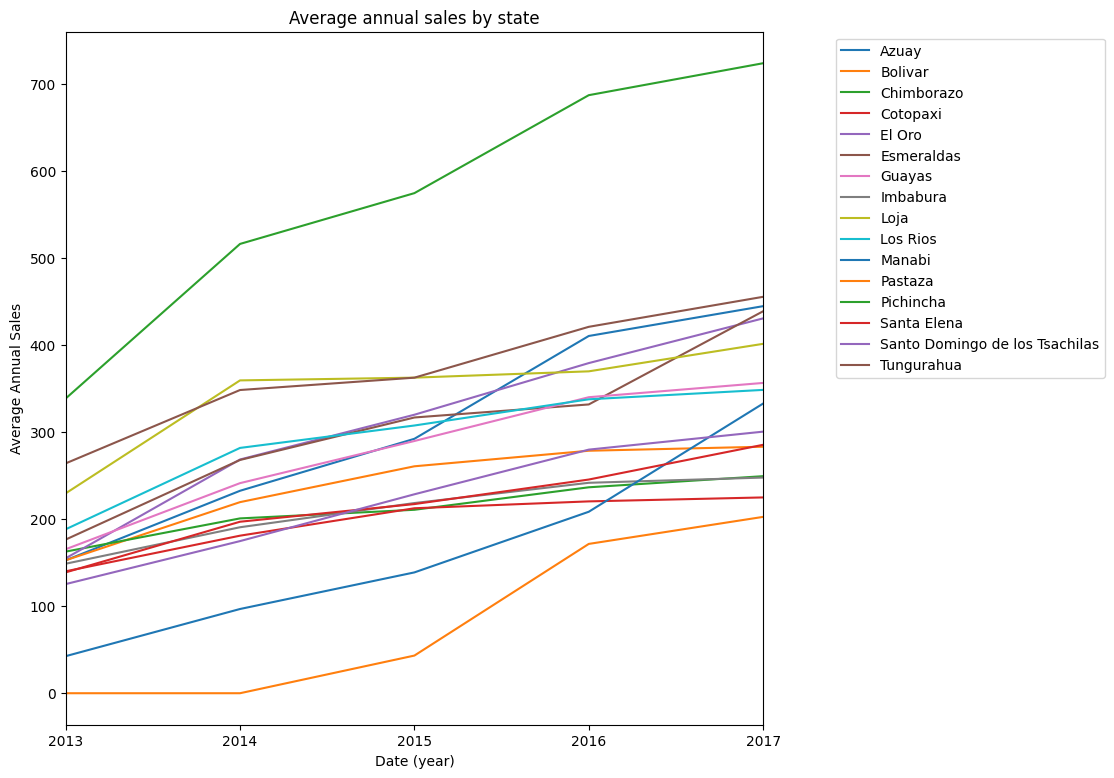

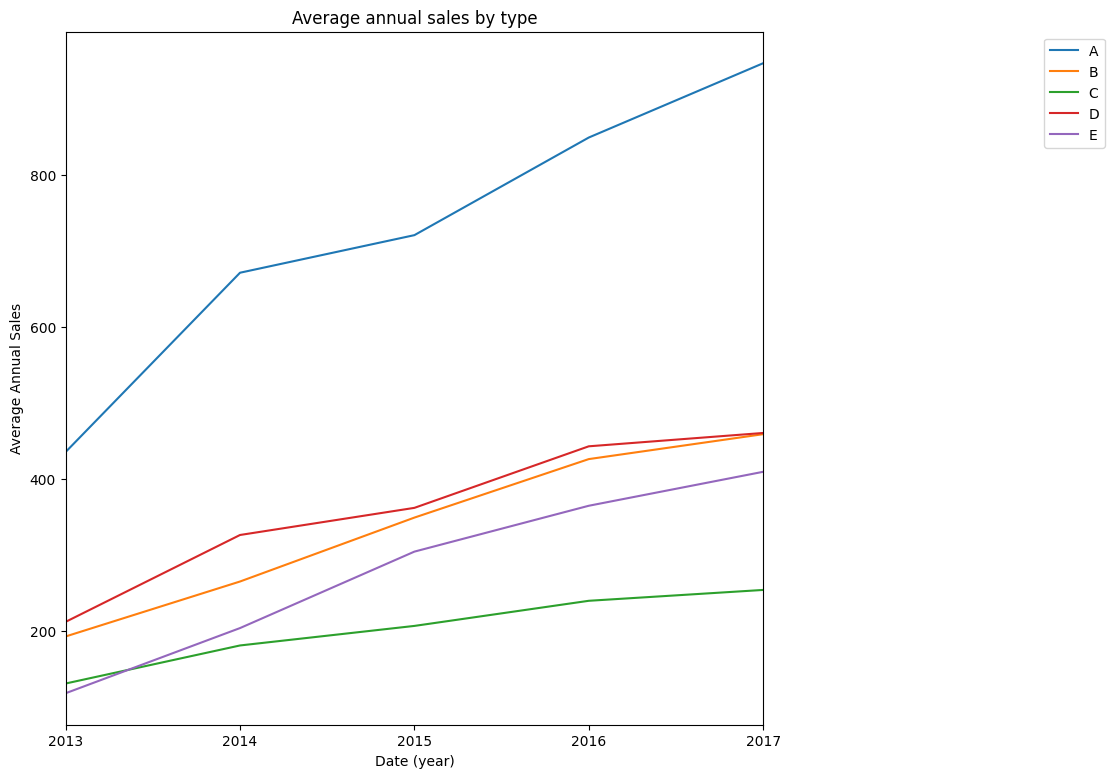

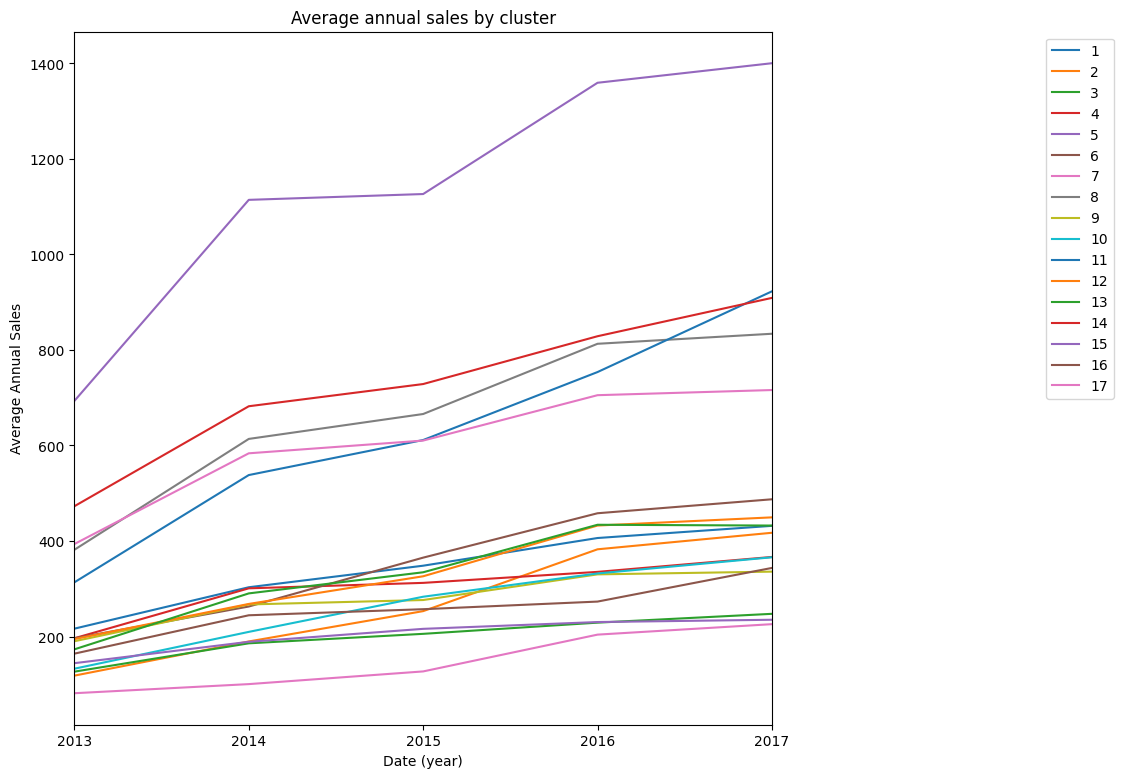

Variable names: 

store_sales_by_store_nbr
store_sales_by_family
store_sales_by_city
store_sales_by_state
store_sales_by_type
store_sales_by_cluster


In [54]:
plot_vars(df,'sales',var_list)

#### 4.4 Daily sales trends<a id='4.4'></a>

Now that we have a macro view of Favorita sales, lets look at how sales occur on a day-to-day basis. We can use a similar function.

In [55]:
var_list = ['store_nbr','family','city','state','type','cluster']
def daily_box_plot(df,target,var_list):
    

    name_list = []
    for e, v in enumerate(var_list):

        g_by = var_list[e]
        lg = str(max(df[v].astype(str), key=len))
        
        sns.boxplot(x=v, y=target, data=df, palette='husl', showfliers=False)

        fig = plt.gcf()
        fig.set_size_inches(14, 9)
        plt.title('Daily sales information by {}'.format(v))
        if len(lg)>2:
            plt.xticks(rotation = 90)
        else:
            pass
        plt.xlabel(v)
        plt.ylabel('Daily sales')
        plt.show()


Running the function with our desired data produces boxplots detailing the daily sales volume as a function of 'store_nbr','family','city','state','type', and 'cluster'.

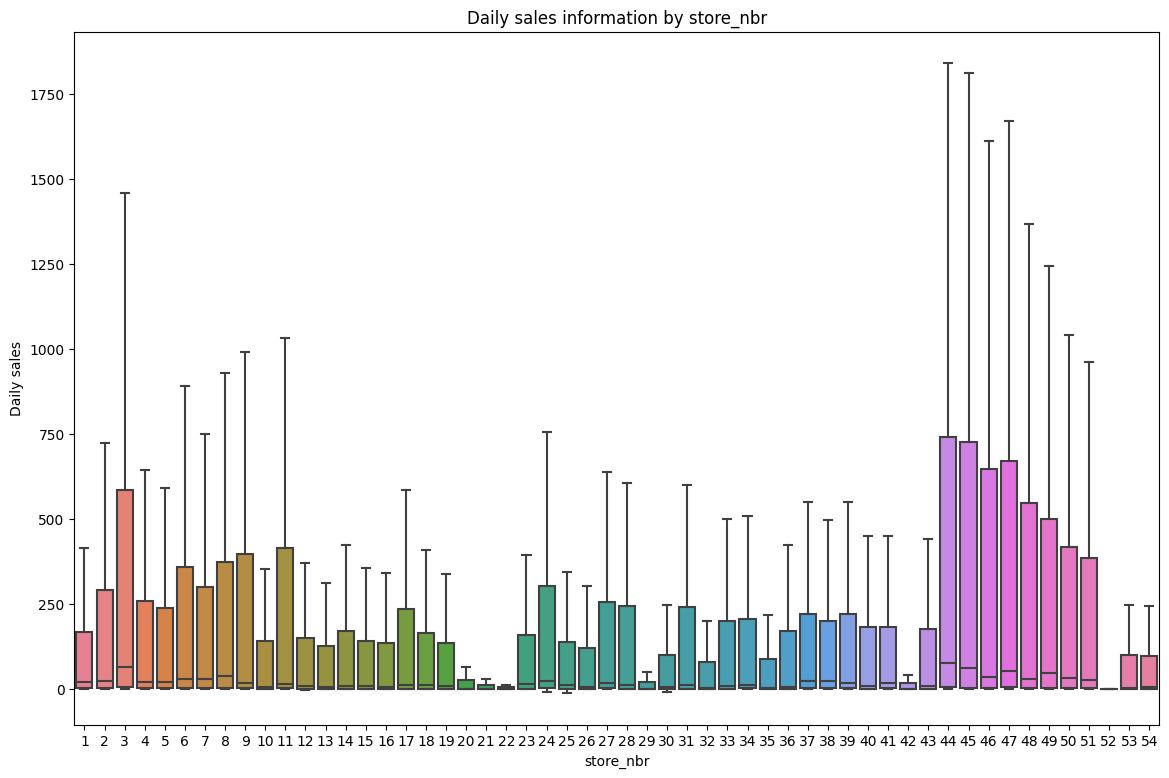

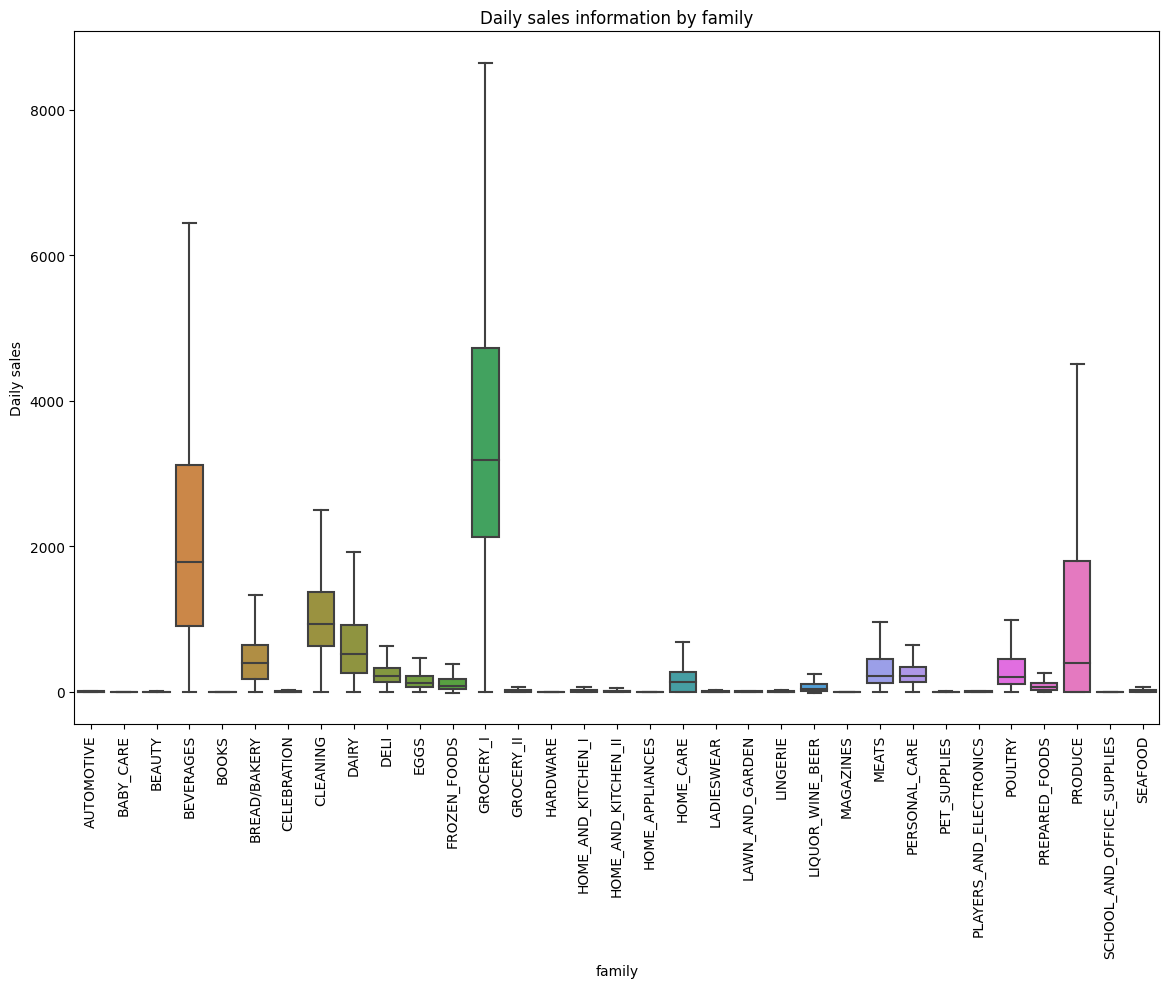

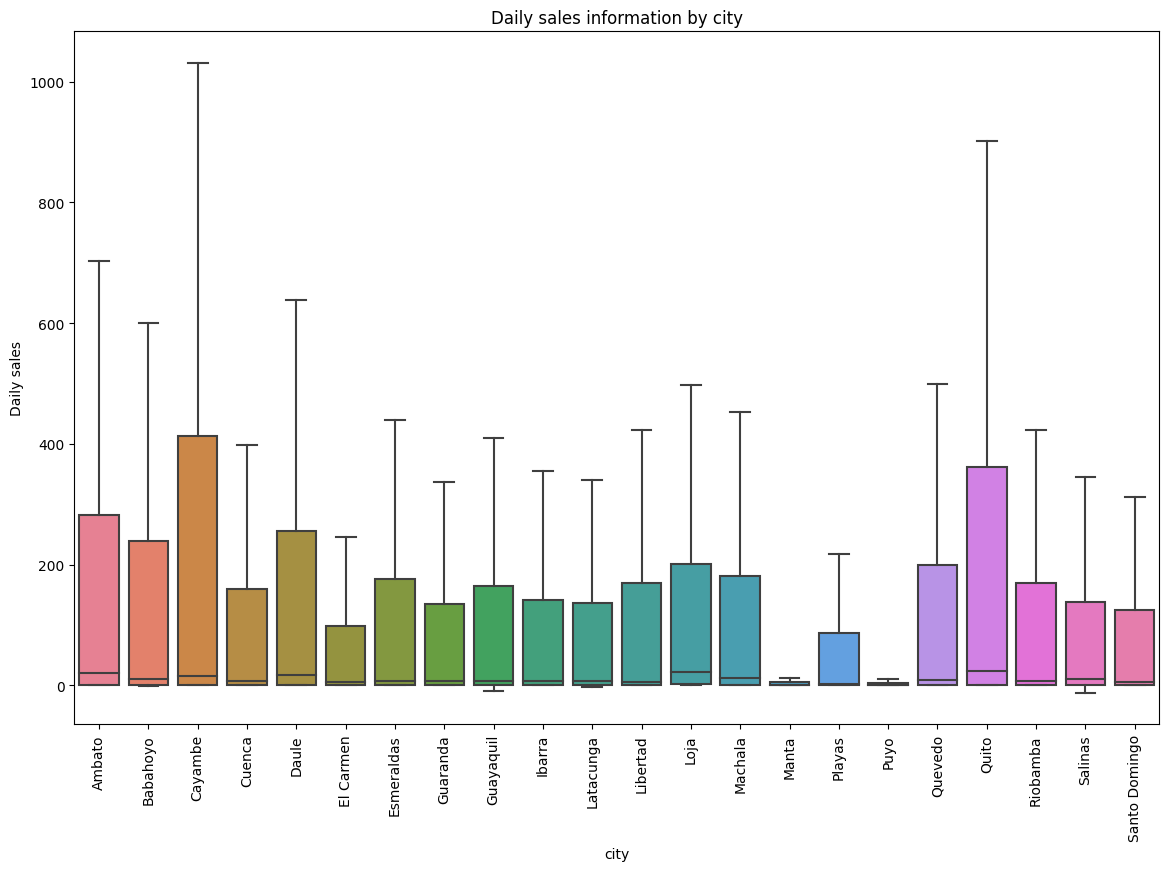

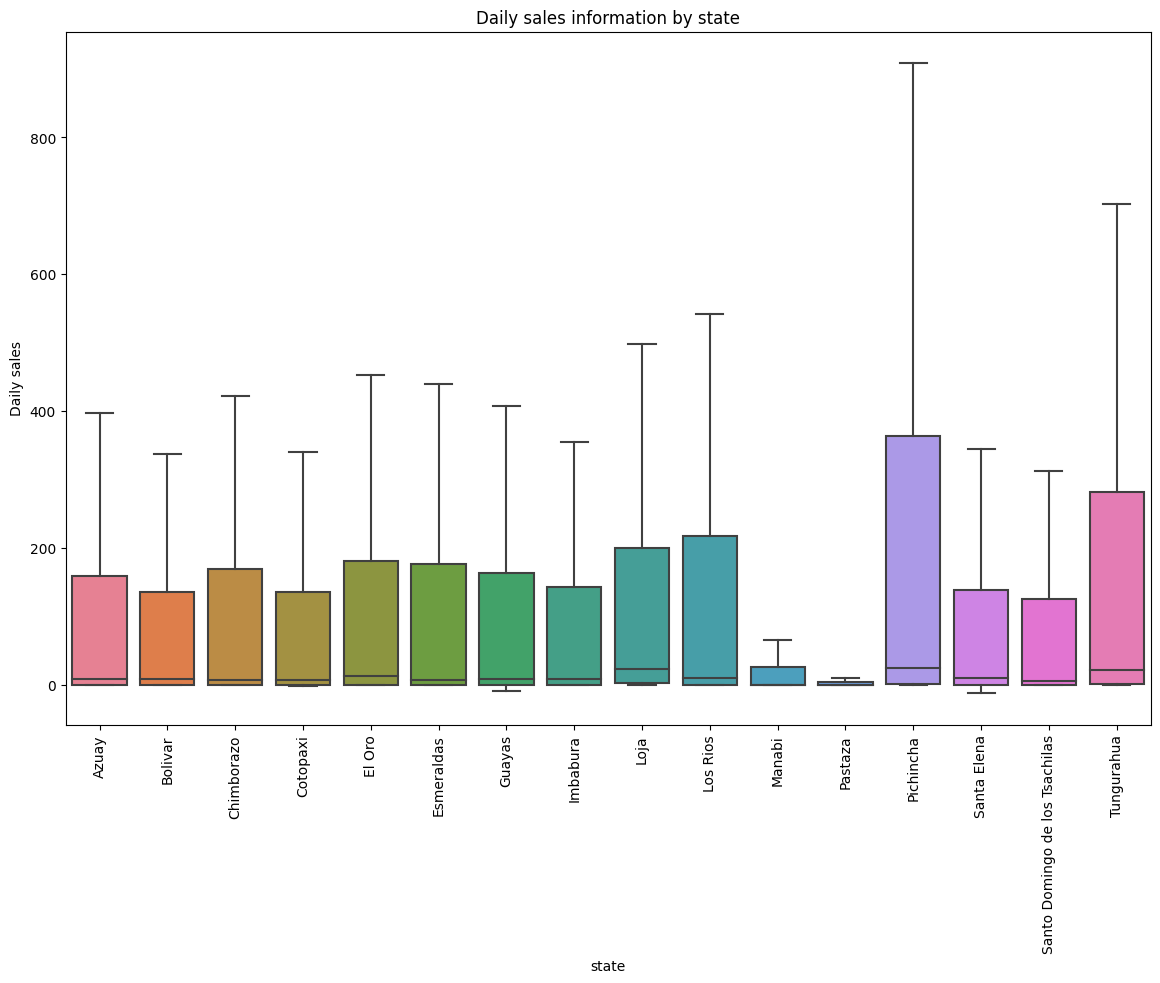

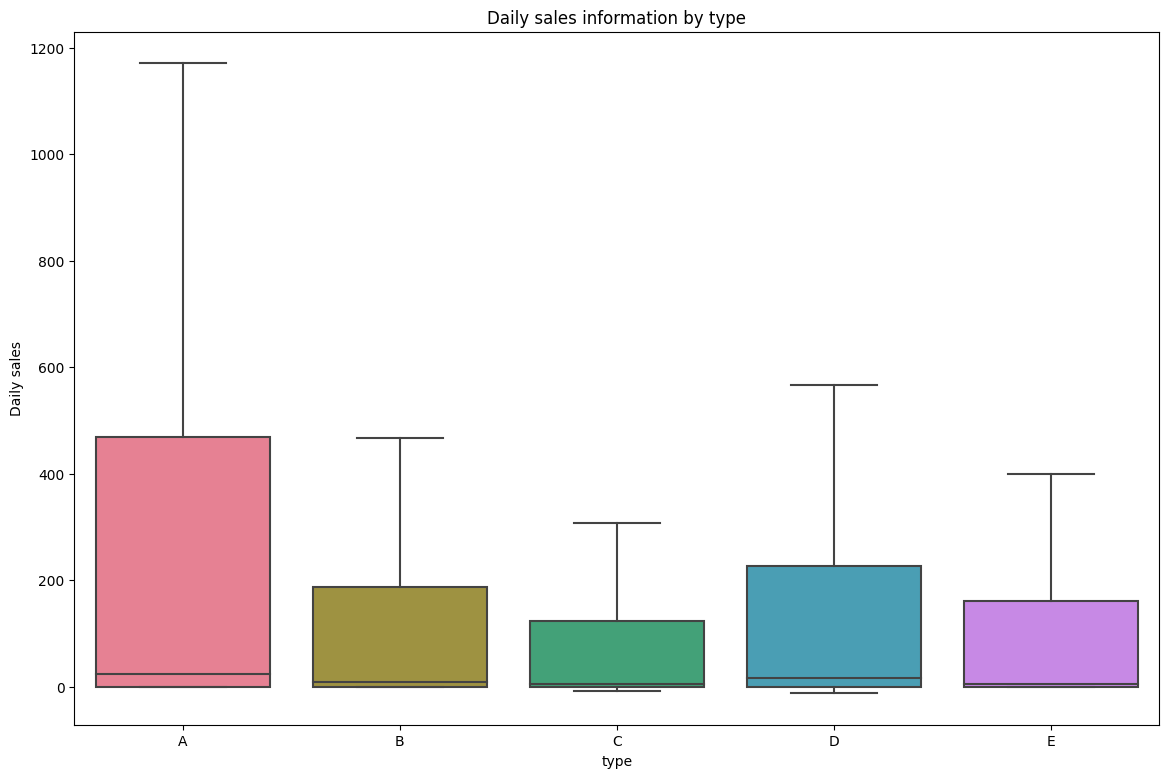

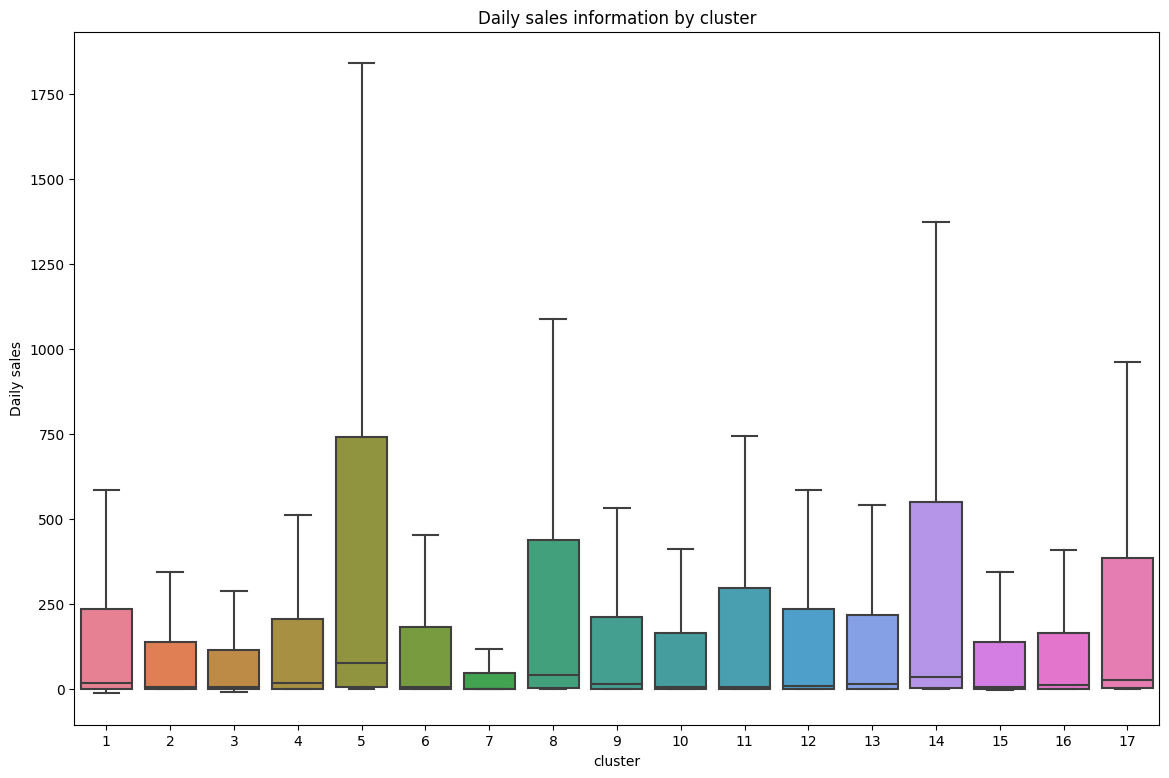

In [56]:
daily_box_plot(df,'sales',var_list)

This is very informative. We can clearly see the types of each variable that have the most sales.

For store number, stores 3, 44, 45, 46, and 47 see the most volume.

For product family, 'GROCERY I' takes the cake, followed by 'BEVERAGES' and 'PRODUCE'. The non-consumable product family with the highest median sales is 'CLEANING'.

For city, Cayambe has the widest range and highest single day, but Quito has the largest median sales, followed by Loja and Ambato.

For state, you can expect Pichincha to have the most sales on any single day based on it having the highest sales day and largest range. However, Both Loja and Tungurahua have about the same median sales.

For store type, 'A' is the clear winner in terms of median, maximum, and range.

Likewise, for cluster, 5 has the highest median, maximum, and range; followed by clusters 8, 14, and 17.

### 5.0 Visualizing non-sales data<a id='5.0'></a>

Other variables in our data will contribute to the analysis, and therefore we need to explore them.

#### 5.1 Visualizing oil data<a id='5.1'></a>

Since oil is a commodity that is intricately intertwined in Ecuador's economy, we should get an idea of what the oil data looks like.

<function matplotlib.pyplot.show(close=None, block=None)>

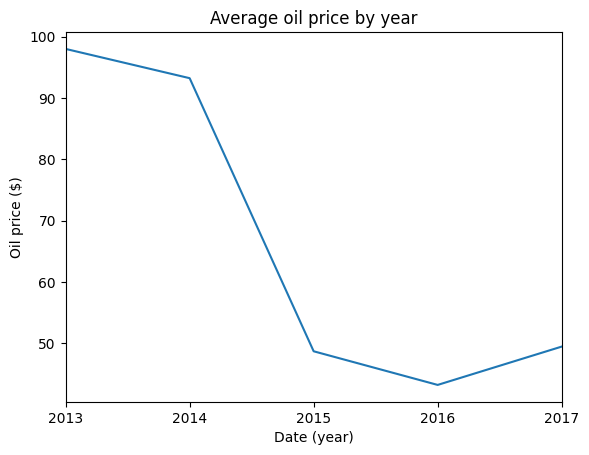

In [57]:
oil_by_year = df.groupby([df.index.to_period('Y')])['dcoilwtico'].agg(np.mean)

ax = oil_by_year.plot()
plt.title('Average oil price by year')
plt.xlabel('Date (year)')
plt.ylabel('Oil price ($)')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show

The price of oil looks to be comparatively high at the start of our data in 2013, but sees a steep decline after the start of 2014.

We can also see if there are certain months that have higher or lower oil prices.

In [58]:
#In a new dataframe, remove the incomplete month of August 2017
df_no_aug_2017 = df[df.index<'2017-08-01']

#Group by year-month and average all days for each year-month
oil_by_month = df_no_aug_2017.groupby([df_no_aug_2017.index.to_period('M')]).agg(np.mean)

#Group by month and average over the years
oil_by_month['month'] = oil_by_month.index.month

oil_by_month = oil_by_month.groupby([oil_by_month['month']])['dcoilwtico'].agg(np.mean)

<function matplotlib.pyplot.show(close=None, block=None)>

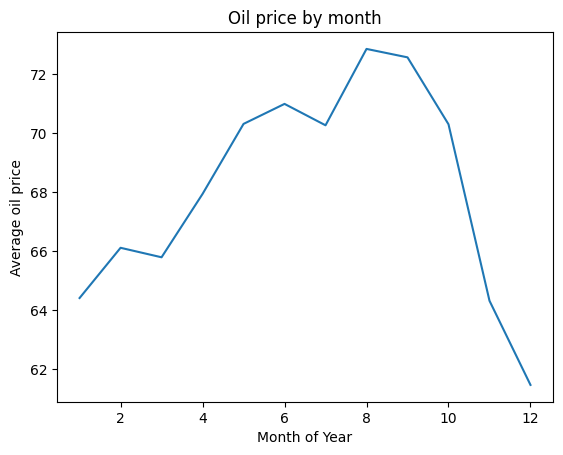

In [59]:
ax = oil_by_month.plot()
plt.title('Oil price by month')
plt.xlabel('Month of Year')
plt.ylabel('Average oil price')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show

There is an obvious cycle here, with the price of oil rising steadily from January to August, after which there is a steeper price decline from August through December.

<function matplotlib.pyplot.show(close=None, block=None)>

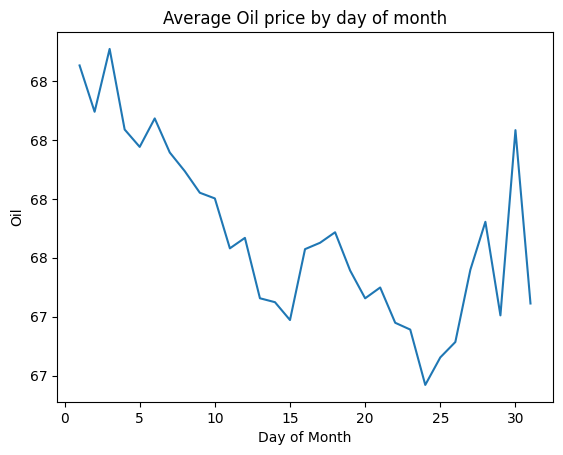

In [60]:
#In a new dataframe, remove the incomplete month of August 2017
df_no_aug_2017 = df[df.index<'2017-08-01']

#Group by year-month and sum all days for each year-month
oil_by_day = df_no_aug_2017.groupby([df_no_aug_2017.index.to_period('D')]).agg(np.mean)

#Group by month and average over the years
oil_by_day['day'] = oil_by_day.index.day

oil_by_day_g = oil_by_day.groupby([oil_by_day['day']])['dcoilwtico'].agg(np.mean)

#plot
ax = oil_by_day_g.plot()
plt.title('Average Oil price by day of month')
plt.xlabel('Day of Month')
plt.ylabel('Oil')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show

Considering oil's intra-monthly fluctuations shows that it usually starts high, then steadily decreases throughout the first three weeks, bottoming out around the 24th day before starting to trend up again.

#### 5.2 Visualizing transaction data<a id='5.2'></a>

There is also transaction data available in our dataset, which we will explore.

<function matplotlib.pyplot.show(close=None, block=None)>

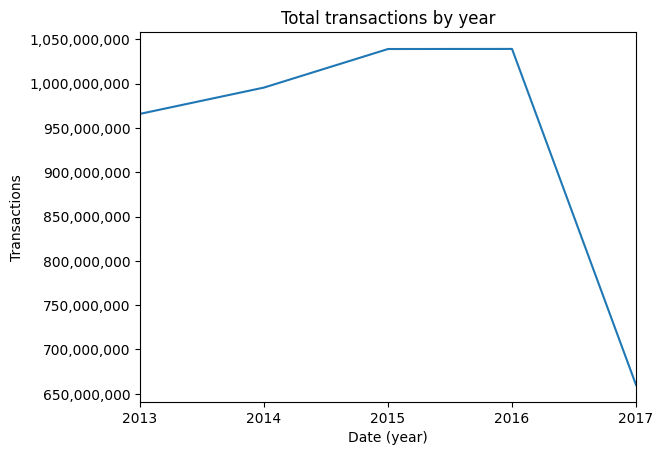

In [61]:
tx_by_year = df.groupby([df.index.to_period('Y')])['transactions'].agg(sum)

ax = tx_by_year.plot()
plt.title('Total transactions by year')
plt.xlabel('Date (year)')
plt.ylabel('Transactions')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show

As before, this chart is showing an unfinished 2017, but we can still see a clear uptrend through the years of our data, with a plateau in 2016.

In [62]:
#In a new dataframe, remove the incomplete month of August 2017
df_no_aug_2017 = df[df.index<'2017-08-01']

#Group by year-month and sum all days for each year-month
tx_by_month = df_no_aug_2017.groupby([df_no_aug_2017.index.to_period('M')]).agg(sum)

#Group by month and average over the years
tx_by_month['month'] = tx_by_month.index.month

tx_by_month = tx_by_month.groupby([tx_by_month['month']])['transactions'].agg(np.mean)

<function matplotlib.pyplot.show(close=None, block=None)>

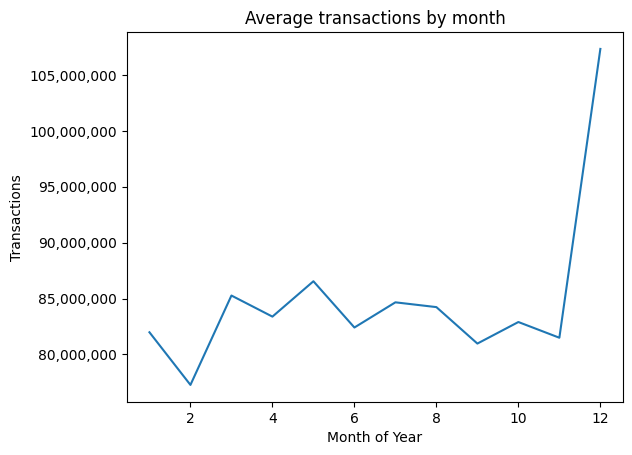

In [63]:
ax = tx_by_month.plot()
plt.title('Average transactions by month')
plt.xlabel('Month of Year')
plt.ylabel('Transactions')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show

The pattern of extreme December results continues, as transaction data spikes during December. A local peak occurs in May, with the absolute low in February, and a local trough in September.

It is also interesting to note that low oil prices seem to coincide with higher transactions and sales.

<function matplotlib.pyplot.show(close=None, block=None)>

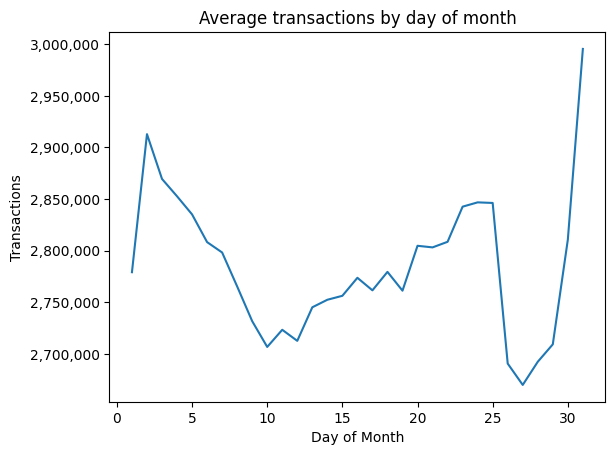

In [64]:
#In a new dataframe, remove the incomplete month of August 2017
df_no_aug_2017 = df[df.index<'2017-08-01']

#Group by year-month and sum all days for each year-month
tx_by_day = df_no_aug_2017.groupby([df_no_aug_2017.index.to_period('D')]).agg(sum)

#Group by month and average over the years
tx_by_day['day'] = tx_by_day.index.day

tx_by_day_g = tx_by_day.groupby([tx_by_day['day']])['transactions'].agg(np.mean)

#plot
ax = tx_by_day_g.plot()
plt.title('Average transactions by day of month')
plt.xlabel('Day of Month')
plt.ylabel('Transactions')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show

As previously discussed, Kaggle tells us that public sector employees are paid bimonthly on the 15th and the last day of each month. That may explain, in part, the end-of-month transaction volume increase.

#### 5.3 Relationships between time series<a id='5.3'></a>

We can gain insights by looking at correlations between the three time-series variables of sales, transactions, and oil price.

In [65]:
#In a new dataframe, remove the incomplete month of August 2017
df_no_aug_2017 = df[df.index<'2017-08-01']

#Group by day-year-month and sum all days for each year-month
by_day = df_no_aug_2017.groupby([df_no_aug_2017.index.to_period('D')]).agg({
    "sales":sum,"transactions":sum,"dcoilwtico":np.mean})

#Group by month and average over the years
# Only interested in non-categorical columns
by_day['day'] = tx_by_day.index.day

by_day_g = by_day[['transactions','dcoilwtico','sales']]

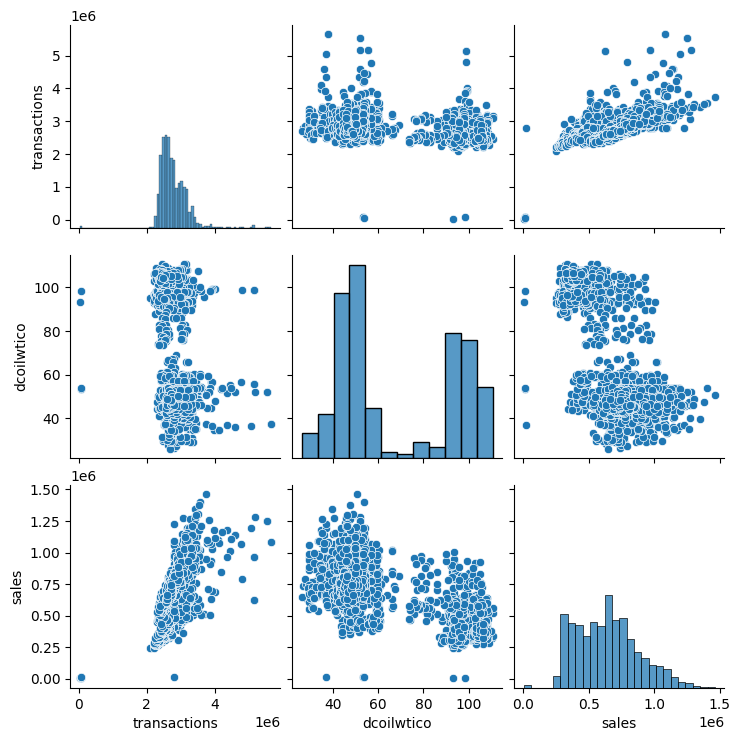

In [66]:
sns.pairplot(by_day_g)


The interesting bimodal-looking distribution of each scatterplot involving oil is likely the result of the precipitous oil price decrease midway through the data.

We can take a closer look at the relationship between these datapoints using correlation.

In [67]:
sales_data = sales_by_day['sales']
tx_data = tx_by_day['transactions']
oil_data = oil_by_day['dcoilwtico']

First we will plot sales and transaction data.

Text(0, 1, 'Correlation = 0.66781')

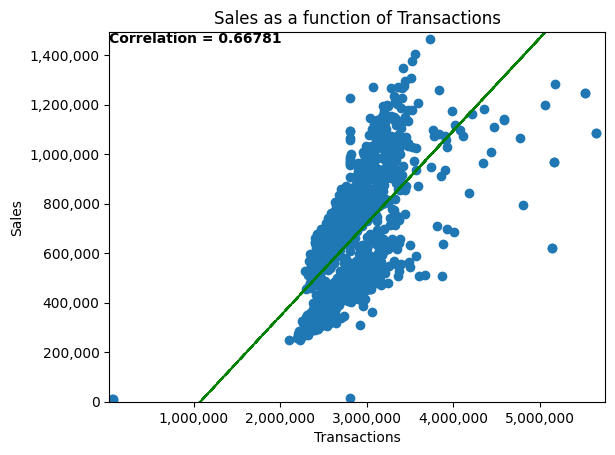

In [68]:
ax = plt.axes()
plt.scatter(tx_data,sales_data)

plt.title('Sales as a function of Transactions')
plt.xlabel('Transactions')
plt.ylabel('Sales')
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

b, m = polyfit(tx_data, sales_data, 1)
plt.plot(tx_data,b+(tx_data*m),'g--')
ax.set_xlim(min(tx_data),max(tx_data)*1.02)
ax.set_ylim(0,max(sales_data)*1.02)
corr,_ = pearsonr(tx_data,sales_data)
plt.text(0,1, "Correlation = {}".format(round(corr,5)),size='medium', 
         verticalalignment="top", color='black', weight='semibold',transform=ax.transAxes)

As would be expected, sales correlate strongly positive with transactions: 0.68.

Next, we will plot sales and oil price data.

Text(0, 1, 'Correlation = -0.6242')

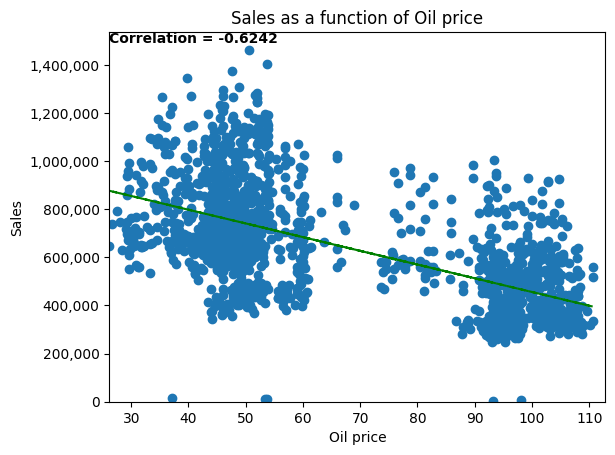

In [69]:
ax = plt.axes()
plt.scatter(oil_data,sales_data)

plt.title('Sales as a function of Oil price')
plt.xlabel('Oil price')
plt.ylabel('Sales')
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

b, m = polyfit(oil_data, sales_data, 1)
plt.plot(oil_data,b+(oil_data*m),'g--')
ax.set_xlim(min(oil_data),max(oil_data)*1.02)
ax.set_ylim(0,max(sales_data)*1.05)
corr,_ = pearsonr(oil_data,sales_data)
plt.text(0,1, "Correlation = {}".format(round(corr,5)),size='medium', 
         verticalalignment="top", color='black', weight='semibold',transform=ax.transAxes)

There is a strong negative correlation between sales and oil price: -0.624.

Finally, we can plot the correlation between transactions and oil price.

Text(0, 1, 'Correlation = -0.24535')

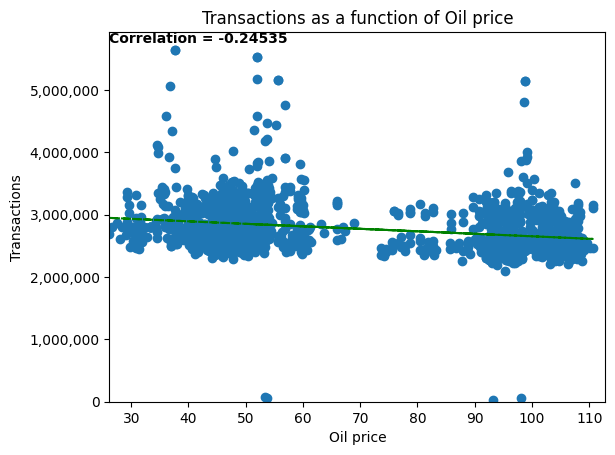

In [70]:
ax = plt.axes()
plt.scatter(oil_data,tx_data)

plt.title('Transactions as a function of Oil price')
plt.xlabel('Oil price')
plt.ylabel('Transactions')
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

b, m = polyfit(oil_data, tx_data, 1)
plt.plot(oil_data,b+(oil_data*m),'g--')
ax.set_xlim(min(oil_data),max(oil_data)*1.02)
ax.set_ylim(0,max(tx_data)*1.05)
corr,_ = pearsonr(oil_data,tx_data)
plt.text(0,1, "Correlation = {}".format(round(corr,5)),size='medium', 
         verticalalignment="top", color='black', weight='semibold',transform=ax.transAxes)

There seems to be a weak negative correlation between transactions and oil price: -0.25.

#### 5.4 Relationship between holidays and sales<a id='5.4'></a>

Another aspect of the data to keep in mnd is the existence of holidays and events which can affect Ecuadorians' shopping habits.

Looking at one example of a store/family combination with holidays labeled could be illustrative.

In [71]:
lh = Store_12_BEVERAGES[Store_12_BEVERAGES['local_holiday']==1].index
rh = Store_12_BEVERAGES[Store_12_BEVERAGES['regional_holiday']==1].index
nh = Store_12_BEVERAGES[Store_12_BEVERAGES['national_holiday']==1].index


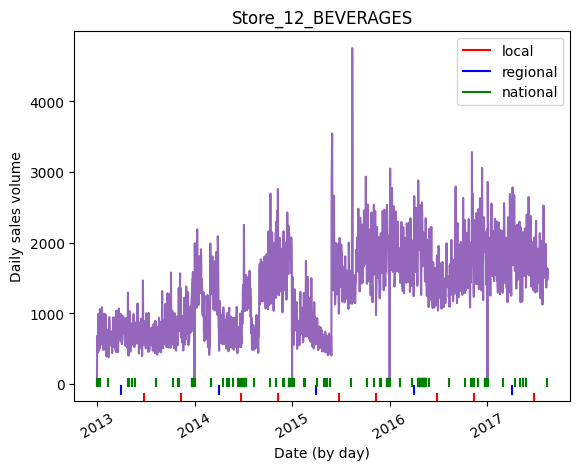

In [72]:
plt.plot(Store_12_BEVERAGES.sales, color='C4')
plt.title('Store_12_BEVERAGES')


[plt.axvline(i,color='r',ymin=0.00,ymax=.02, label="local") for i in lh]
[plt.axvline(i,color='b',ymin=0.02,ymax=.04, label="regional") for i in rh]
[plt.axvline(i,color='g',ymin=0.04,ymax=.06, label="national") for i in nh]

#remove repeat labels
handles, labels = plt.gca().get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
plt.legend(newHandles, newLabels)

plt.xticks(rotation = 30) 
plt.xlabel("Date (by day)")
plt.ylabel("Daily sales volume")

plt.show()

Unfortunately, it is difficult to spot any patterns like this.

Another way to visualize the effect of holidays is to group all of the data by date and chart sales by whether there was a holiday or not.

In [73]:
#In a new dataframe, remove the incomplete month of August 2017
df_no_aug_2017 = df[df.index<'2017-08-01']

#Group by day-year-month and sum all days for each year-month
sales_group = df_no_aug_2017.groupby([df_no_aug_2017.index.to_period('D')]).agg({
    "sales":sum,'onpromotion':np.mean,
    'local_holiday':max,'regional_holiday':max,'national_holiday':max})

In [74]:
sales_group

,sales,onpromotion,local_holiday,regional_holiday,national_holiday
2013-01-01,2.511619e+03,0.000000,0.0,0.0,1.0
2013-01-02,4.960924e+05,0.000000,0.0,0.0,0.0
2013-01-03,3.614612e+05,0.000000,0.0,0.0,0.0
2013-01-04,3.544597e+05,0.000000,0.0,0.0,0.0
2013-01-05,4.773501e+05,0.000000,0.0,0.0,1.0
...,...,...,...,...,...
2017-07-27,6.598498e+05,4.489899,0.0,0.0,0.0
2017-07-28,8.350997e+05,7.772166,0.0,0.0,0.0
2017-07-29,1.032311e+06,5.106061,0.0,0.0,0.0
2017-07-30,1.123752e+06,5.739057,0.0,0.0,0.0


First we will look at local holidays.

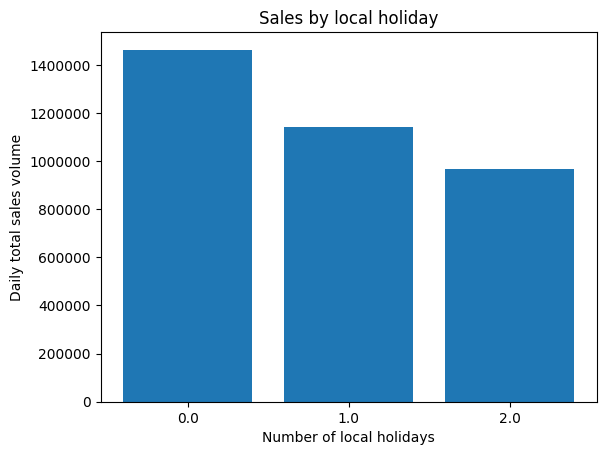

In [75]:
plt.bar(sales_group['local_holiday'].astype(str),sales_group['sales'])
plt.title('Sales by local holiday')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Number of local holidays")
plt.ylabel("Daily total sales volume")
plt.show()

The presence of local holidays anywhere in Ecuador severely decreases the national sales for that day.

Next we can visualize regional holidays.

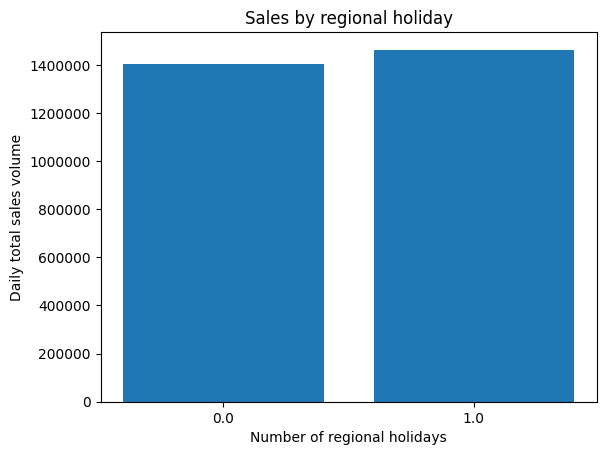

In [76]:
plt.bar(sales_group['regional_holiday'].astype(str),sales_group['sales'])
plt.title('Sales by regional holiday')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Number of regional holidays")
plt.ylabel("Daily total sales volume")
plt.show()

Regional holidays do not seem to have much of an effect on sales, with a slight uptick on regional holidays.

Next, we will explore national holidays.

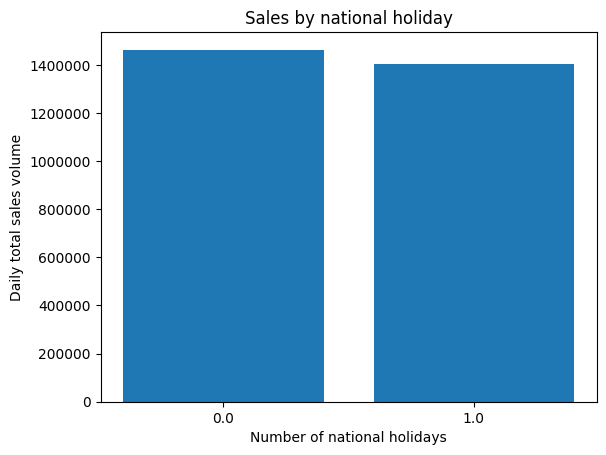

In [77]:
plt.bar(sales_group['national_holiday'].astype(str),sales_group['sales'])
plt.title('Sales by national holiday')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Number of national holidays")
plt.ylabel("Daily total sales volume")
plt.gca().invert_xaxis()
plt.show()

Another negligable effect, with a slight downtick in sales on national holidays.

Finally, we can see if having promotions changes sales.

In [78]:
just_promos = sales_group[sales_group['onpromotion']>0]


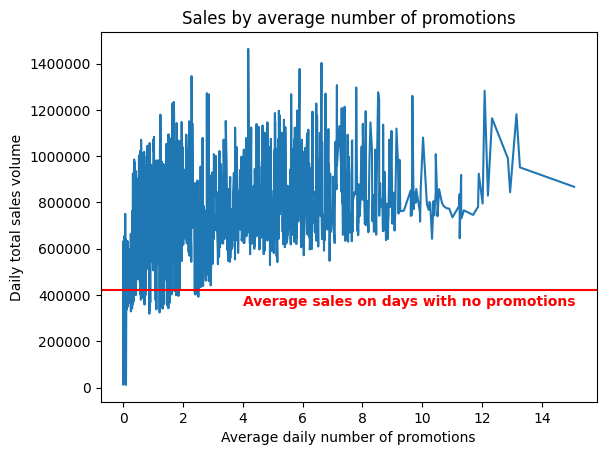

In [79]:
just_promos = sales_group[(sales_group['onpromotion']>0)&(sales_group['sales']>0)].sort_values('onpromotion')
plt.plot(just_promos['onpromotion'],just_promos['sales'])
plt.axhline(y = np.mean(sales_group[sales_group['onpromotion']==0]['sales']), color ='r')
plt.title('Sales by average number of promotions')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Average daily number of promotions")
plt.ylabel("Daily total sales volume")
plt.text(4,400000, "Average sales on days with no promotions",size='medium', 
         verticalalignment="top", color='r', weight='semibold')

plt.show()

Overall, it appears that days with more promotions generally (mostly) have more sales.

### 6.0 Decomposing the time series<a id='6.0'></a>

The final step is to visualize the decomposed time series.

#### 6.1 Dickey-Fuller test<a id='6.1'></a>

First, we want to see if the series have stationarity. Observations from a non-stationary time series show time-dependant seasonal effects and trends.


The best way to determine this is by performing the Augmented Dickey-Fuller unit root test.

According to the statsmodels documentation [4], "The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation."



[4] https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

Null Hypothesis (H0): The time series has a unit root, meaning it is non-stationary. There exists a time dependent structure.

Alternate Hypothesis (H1): The time series does not have a unit root, meaning it is stationary. There is not a time-dependent structure.



p-value > 0.05: Accept the null hypothesis (H0), the data *is not* stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data *is* stationary.

In [92]:
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

We can make a function to plot a time series with the rolling mean and standard deviation visible, which also outputs the results of the Dickey-Fuller test.

In [130]:
def plot_stationarity(tsdf):

    # 30 day (1 month) rolling statistics
    rolmean = tsdf.rolling(window=30).mean()
    rolstd = tsdf.rolling(window=30).std()
  
    plt.figure(figsize=(12,6))
    sns.despine(left=True)
    orig = plt.plot(tsdf,label='Sales',color='violet')
    mean = plt.plot(rolmean,label='Rolling Mean',color='green')
    std = plt.plot(rolstd,label = 'Rolling Std')
    
    plt.xlabel("Time")
    plt.ylabel("Sales volume")
    
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(tsdf, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput.round(2))

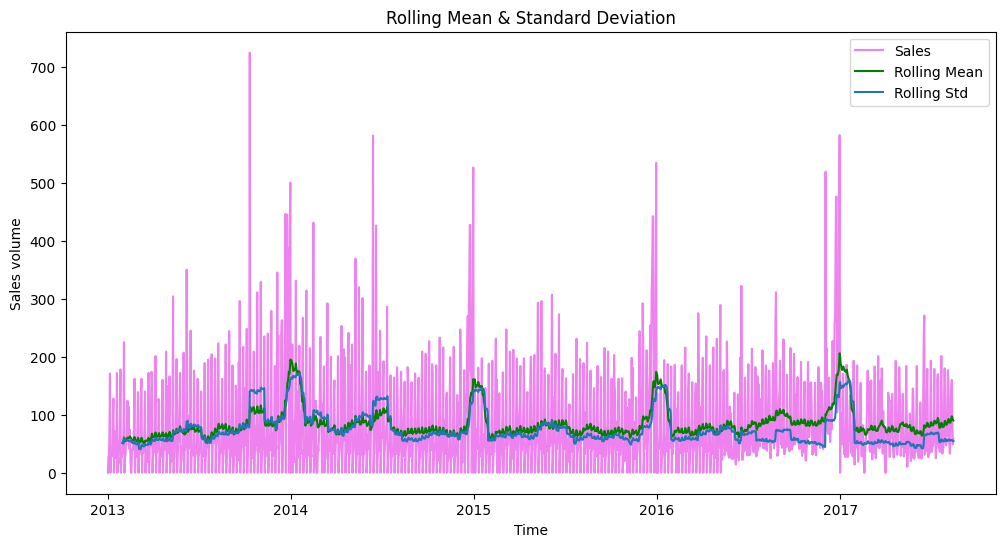

<Results of Dickey-Fuller Test>
Test Statistic                   -6.65
p-value                           0.00
#Lags Used                       23.00
Number of Observations Used    1664.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [131]:
plot_stationarity(store_family_list[1111]['sales'])

The results for this one time series (out of 1782) can be interpreted as:

The p-value is much lower than 0.05, which suggests that the null hypothesis can be rejected, the data does not have a unit root, and it is therefore stationary.

However, we have 33 product families in 54 stores to account for, so visualizing all 1782 will be impossible. We can create a new function which performs the Dickey-Fuller test on each time series and computes the percent of them which reject the null hypothesis.

In [113]:
def dft(tsdf):
    
    dftest = adfuller(tsdf, autolag='AIC')
    p_val = dftest[1]
    return p_val

def test_stationarity(df_list,target):

    num_df = len(df_list)
    p_sig = 0
    count = 0
    for df in df_list:
        p_val = dft(df[target])
        if p_val <= 0.05:
            p_sig += 1
            
        else:
            pass
        
        count+=1
        print("", end="\r{} of {} dataframes tested".format(count,num_df))
    
    num_sig = p_sig*100/num_df
    
    
    return num_sig

In [114]:
df_sigs = test_stationarity(store_family_list,'sales')

1782 of 1782 dataframes tested

In [133]:
print("Of {} dataframes, {}% are stationary.".format(len(store_family_list),round(df_sigs,3)))

Of 1782 dataframes, 71.044% are stationary.


While it would have been preferential for the entirety of our time series to be either entirely stationary or entirely non-stationary, we will work through this development.

#### 6.2 Seasonal Decomposition<a id='6.2'></a>

Machine Learning Mastery describes well the purpose of seasonal decompotition [5] : 

"   
A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

    - Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
    - Non-Systematic: Components of the time series that cannot be directly modeled.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

    -Level: The average value in the series.
    -Trend: The increasing or decreasing value in the series.
    -Seasonality: The repeating short-term cycle in the series.
    -Noise: The random variation in the series.
"

[5] https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

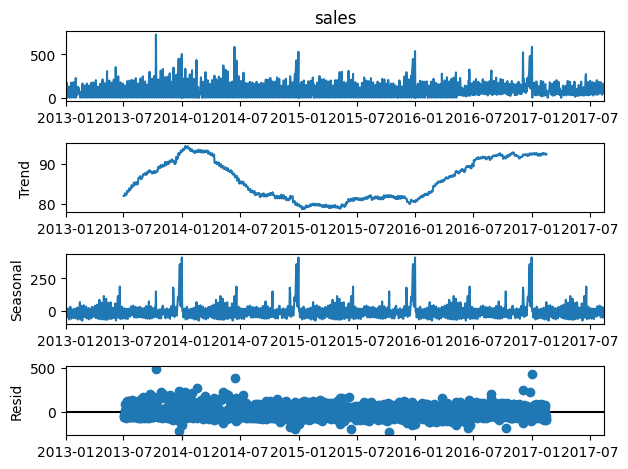

In [136]:
result = seasonal_decompose(store_family_list[1111]['sales'],model='additive',period=365)

# Plot the original data, the trend, the seasonality, and the residuals 
result.plot();

As expected, there appears to be some seasonal trends without a clearly defined overall trend.

### 7.0 Output and Summary<a id='7.0'></a>

In [91]:
f = './favorita_data.csv'
df.to_csv(f)

In this notebook, we imported the conglomerated, wrangled, and cleaned Favorita data. Then we inspected how a time series looked. Upon discovering an issue of missing data immediately, we created a function to resolve the issue and impute the missing data everywhere possible. Then we filled in whatever gaps existed.

Once the data was ready to have its characteristics visualized, we explored sales data by year, month, and day, noting obvious patterns (such as the year-end and month-end peak which occur). We also saw how sales were distrubuted by category for store, product family, city, state, cluster, and store type.

Next, we visualized non-sales data and how it behaved across different time epochs. Oil price and transaction data were then analyzed on their correlation with sales and eachother. 

Finally, we worked on decomposing the time series. Initially, we ran an Augmented Dickey-Fuller test on one time series to determine stationarity, then we created a function that tested each of the 1782 time series in our data. The outcome was that ~71% of the data is stationary. We visualized the elements of one time series as a result of seasonally decomposing it, and output the final data to csv for modeling.